## Crop Yield Prediction using Machine Learning

### Importing Libraries

In [107]:
import numpy as np                                  # Numerical computing and array operations
import pandas as pd                                 # Data manipulation and analysis
from scipy import stats                             # Statistical functions
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF for multicollinearity check

import seaborn as sns                               # Statistical data visualization
import matplotlib.pyplot as plt                     # Plotting library

import warnings                                     # Warning control
import missingno                                    # Missing value visualization
warnings.filterwarnings("ignore")                   # Ignore all warnings
sns.set(style="darkgrid", font_scale=1.5)           # Set seaborn theme and font size
pd.set_option("display.max.columns", None)          # Display all columns in DataFrame
pd.set_option("display.max.rows", None)             # Display all rows in DataFrame

from sklearn.linear_model import LinearRegression   # Simple linear regression model
from sklearn.linear_model import Ridge              # Ridge regression (L2 regularization)
from sklearn.linear_model import Lasso              # Lasso regression (L1 regularization)
from sklearn.linear_model import ElasticNet         # ElasticNet regression (L1 + L2)
from sklearn.tree import DecisionTreeRegressor      # Decision tree regression model
from sklearn.ensemble import RandomForestRegressor  # Random forest regression
from sklearn.ensemble import GradientBoostingRegressor  # Gradient boosting regression
from sklearn.ensemble import AdaBoostRegressor      # AdaBoost regression
from sklearn.ensemble import VotingRegressor        # Ensemble voting regressor
from sklearn.ensemble import StackingRegressor      # Stacking regression
from sklearn.neighbors import KNeighborsRegressor   # KNN regression model
from sklearn.ensemble import BaggingRegressor       # Bagging regression model
from xgboost import XGBRegressor                    # XGBoost regression model
from catboost import CatBoostRegressor              # CatBoost regression (handles categorical data well)
from lightgbm import LGBMRegressor                  # LightGBM regression model

from sklearn.model_selection import train_test_split  # Split dataset into training and testing sets
from sklearn.model_selection import GridSearchCV      # Hyperparameter tuning using grid search
from sklearn.metrics import r2_score                  # R-squared evaluation metric
from sklearn.metrics import mean_squared_error        # Mean squared error metric

from sklearn.preprocessing import StandardScaler      # Standardize features
from sklearn.preprocessing import LabelEncoder        # Encode categorical labels
from sklearn.preprocessing import OneHotEncoder       # One-hot encode categorical variables
from sklearn.preprocessing import MinMaxScaler        # Scale features to a fixed range
from sklearn.preprocessing import PowerTransformer    # Transform features to normal distribution



### Loading Dataset

In [16]:
df = pd.read_csv("crop_yield.csv")

In [17]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


## Basic Understanding of Data and Data Analysis

### Checking Dimensions of the Data

In [18]:
df.shape

(19689, 10)

### Feature Details

In [19]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

1. **`Crop`**: The type of crop grown (e.g., Wheat, Rice).
2. **`Crop_Year`**: The year of cultivation.
3. **`Season`**: The growing season for the crop (e.g., Kharif, Rabi).
4. **`State`**: The state in which the crop was cultivated.
5. **`Area`**: The area under cultivation, typically measured in hectares.
6. **`Production`**: The total production of the crop, measured in tonnes.
7. **`Annual_Rainfall`**: The annual rainfall in the region, likely measured in millimeters.
8. **`Fertilizer`**: The amount of fertilizer used, potentially in kilograms or another unit.
9. **`Pesticide`**: The quantity of pesticide applied, potentially in liters or kilograms.
10. **`Yield`**: The crop yield, calculated as production per unit area, and often the target variable for prediction.

### Checking the basic information of dataset

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


### Descriptive Statistics Analysis

In [21]:
pd.options.display.float_format = '{:.2f}'.format
df.describe(include=["int64","float64"]).T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,19689.00,2009.13,6.50,1997.00,2004.00,2010.00,2015.00,2020.00
Area,19689.00,179926.57,732828.68,0.50,1390.00,9317.00,75112.00,50808100.00
Production,19689.00,16435941.27,263056839.81,0.00,1393.00,13804.00,122718.00,6326000000.00
Annual_Rainfall,19689.00,1437.76,816.91,301.30,940.70,1247.60,1643.70,6552.70
Fertilizer,19689.00,24103312.45,94946004.48,54.17,188014.62,1234957.44,10003847.20,4835406877.00
Pesticide,19689.00,48848.35,213287.35,0.09,356.70,2421.90,20041.70,15750511.00
Yield,19689.00,79.95,878.31,0.00,0.60,1.03,2.39,21105.00


In [22]:
df.describe(include=["object"]).T

,count,unique,top,freq
Crop,19689,55,Rice,1197
Season,19689,6,Kharif,8232
State,19689,30,Karnataka,1432


### Checking NaN values in our Dataset

In [23]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


### Checking Duplicate Values

In [24]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


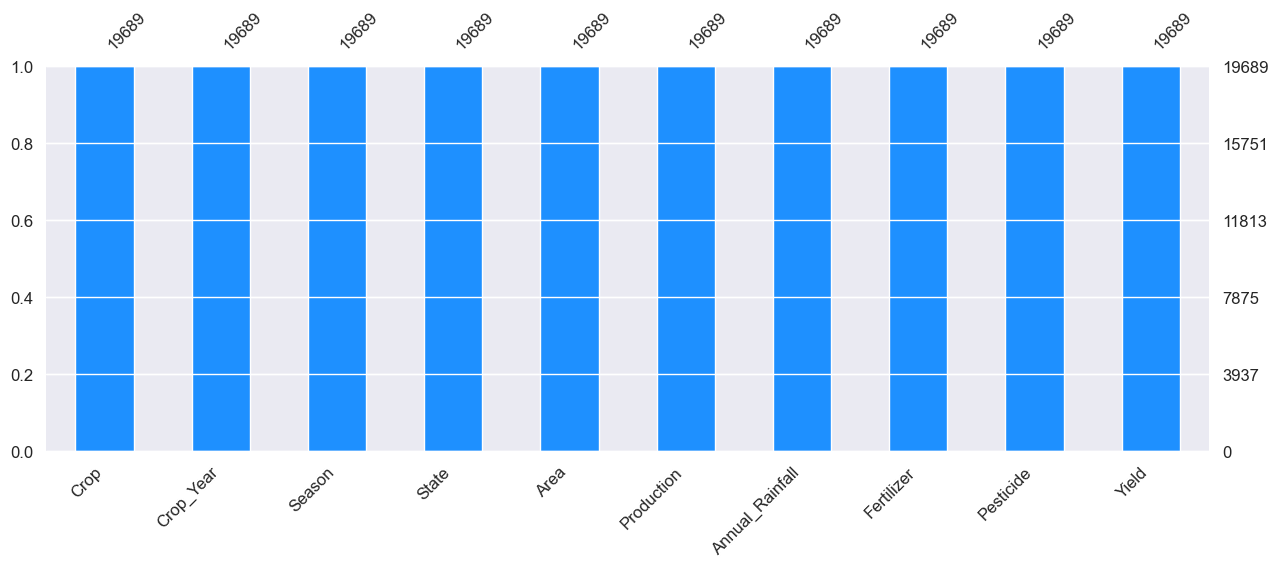

In [25]:
missingno.bar(df, figsize=(15,5), fontsize=12,color="dodgerblue", sort="ascending");
plt.show()

### Separate numerical and categorical variable

In [26]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1997,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,1997,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,1997,796.00,22,2051.40,75755.32,246.76,0.24
3,1997,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,1997,1739.00,794,2051.40,165500.63,539.09,0.42


In [27]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

,Crop,Season,State
0,Arecanut,Whole Year,Assam
1,Arhar/Tur,Kharif,Assam
2,Castor seed,Kharif,Assam
3,Coconut,Whole Year,Assam
4,Cotton(lint),Kharif,Assam


### Correlation matrix for numeric columns

In [28]:
numeric_data.corr()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
Crop_Year,1.00,-0.04,0.00,-0.01,0.01,-0.00,0.00
Area,-0.04,1.00,0.04,-0.11,0.97,0.97,0.00
Production,0.00,0.04,1.00,0.03,0.04,0.04,0.57
Annual_Rainfall,-0.01,-0.11,0.03,1.00,-0.11,-0.10,0.02
Fertilizer,0.01,0.97,0.04,-0.11,1.00,0.95,0.00
Pesticide,-0.00,0.97,0.04,-0.10,0.95,1.00,0.00
Yield,0.00,0.00,0.57,0.02,0.00,0.00,1.00


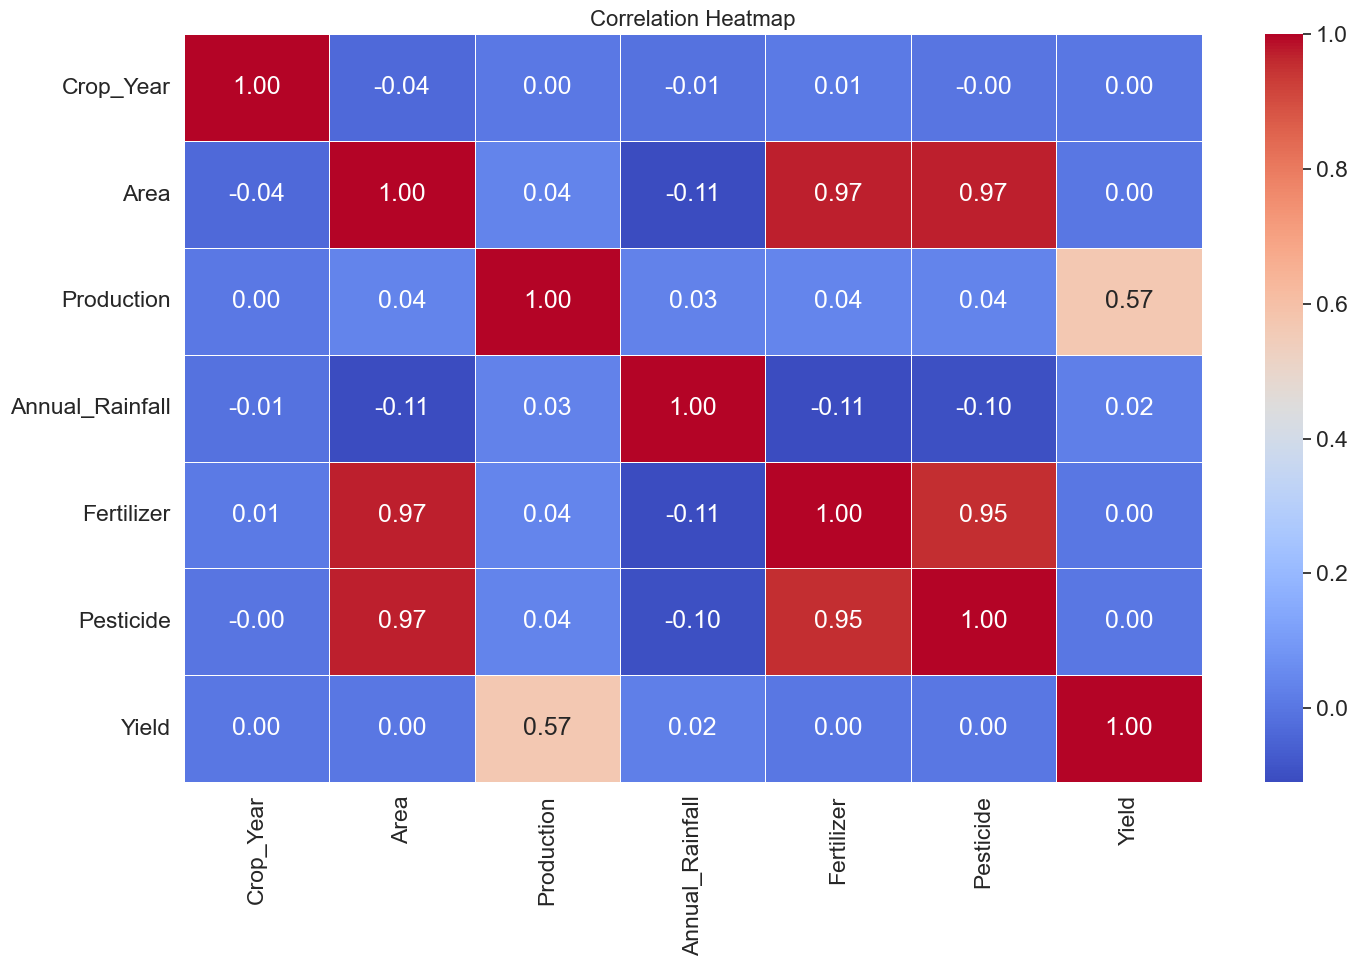

In [32]:
plt.figure(figsize=(15, 10))

corr_matrix = numeric_data.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=False,
    linewidths=0.5,
    cbar=True
)

plt.title("Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.show()


### Count details for each crop year

In [33]:
df['Crop_Year'].value_counts(ascending=False)

Crop_Year
2019    1079
2017    1070
2018    1063
2016    1036
2015     998
2013     976
2014     965
2011     907
2012     894
2009     865
2010     859
2008     847
2007     828
2006     823
2002     815
2005     811
2003     801
2004     787
2000     772
2001     750
1999     650
1998     646
1997     410
2020      37
Name: count, dtype: int64

### Remove records for Year 2020

In [34]:
df = df[df['Crop_Year'] != 2020]

### Count details for each Crops

In [35]:
df['Crop'].value_counts(ascending=False)

Crop
Rice                     1195
Maize                     973
Moong(Green Gram)         738
Urad                      731
Groundnut                 724
Sesamum                   684
Potato                    626
Sugarcane                 604
Wheat                     544
Rapeseed &Mustard         527
Bajra                     524
Jowar                     513
Arhar/Tur                 507
Ragi                      497
Gram                      489
Small millets             484
Cotton(lint)              476
Onion                     453
Sunflower                 439
Dry chillies              419
Other Kharif pulses       381
Horse-gram                370
Peas & beans (Pulses)     368
Tobacco                   363
Other  Rabi pulses        354
Soyabean                  348
Turmeric                  336
Masoor                    323
Ginger                    323
Linseed                   308
Castor seed               300
Barley                    296
Sweet potato              273
Garli

### Count details for each Season

In [36]:
df['Season'].value_counts(ascending=False)

Season
Kharif         8215
Rabi           5732
Whole Year     3712
Summer         1190
Autumn          414
Winter          389
Name: count, dtype: int64

### Count Details for each State

In [37]:
df['State'].value_counts(ascending=False)

State
Karnataka            1432
Andhra Pradesh       1266
West Bengal          1094
Chhattisgarh          915
Bihar                 896
Madhya Pradesh        845
Uttar Pradesh         825
Tamil Nadu            822
Gujarat               817
Maharashtra           770
Odisha                760
Assam                 731
Uttarakhand           727
Nagaland              689
Puducherry            670
Meghalaya             649
Jammu and Kashmir     631
Haryana               631
Himachal Pradesh      616
Kerala                534
Manipur               444
Tripura               441
Mizoram               416
Punjab                397
Telangana             397
Arunachal Pradesh     292
Jharkhand             270
Goa                   246
Sikkim                226
Delhi                 203
Name: count, dtype: int64

### Crop yield per state

In [38]:
df_state_sort = df.groupby('State',as_index=False)['Yield'].sum().sort_values(by='Yield', ascending=False)
df_state_sort

,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


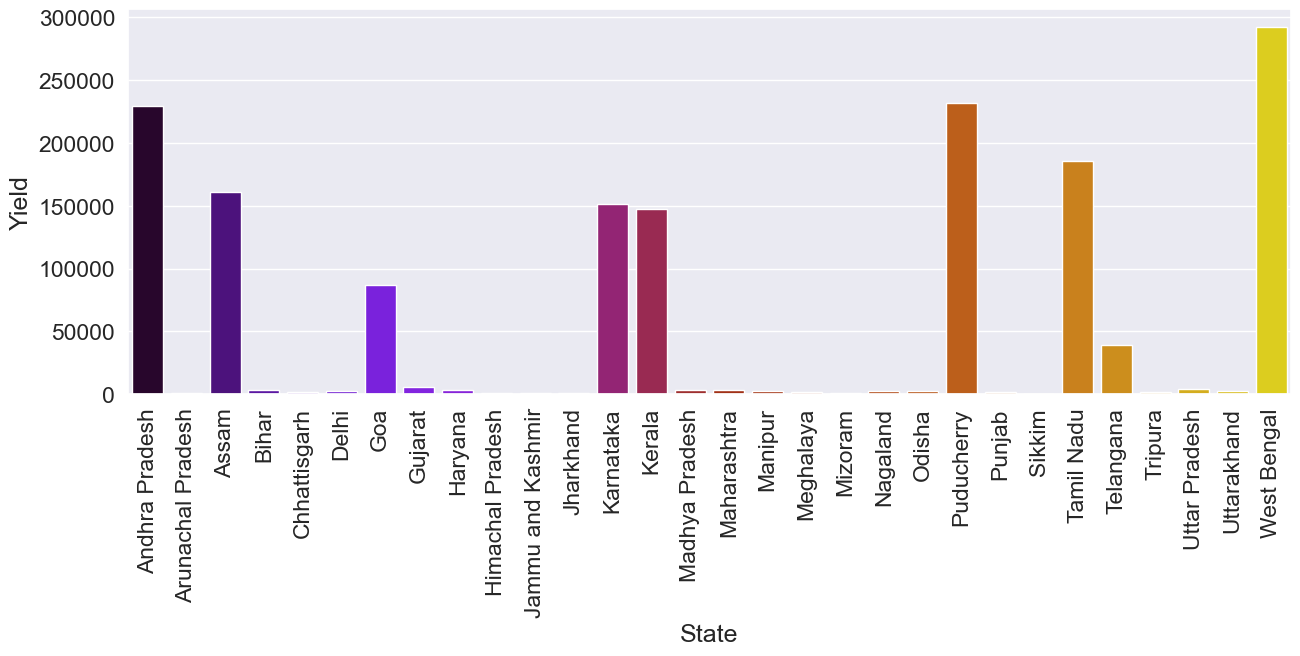

In [41]:
df_state = df.groupby('State',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

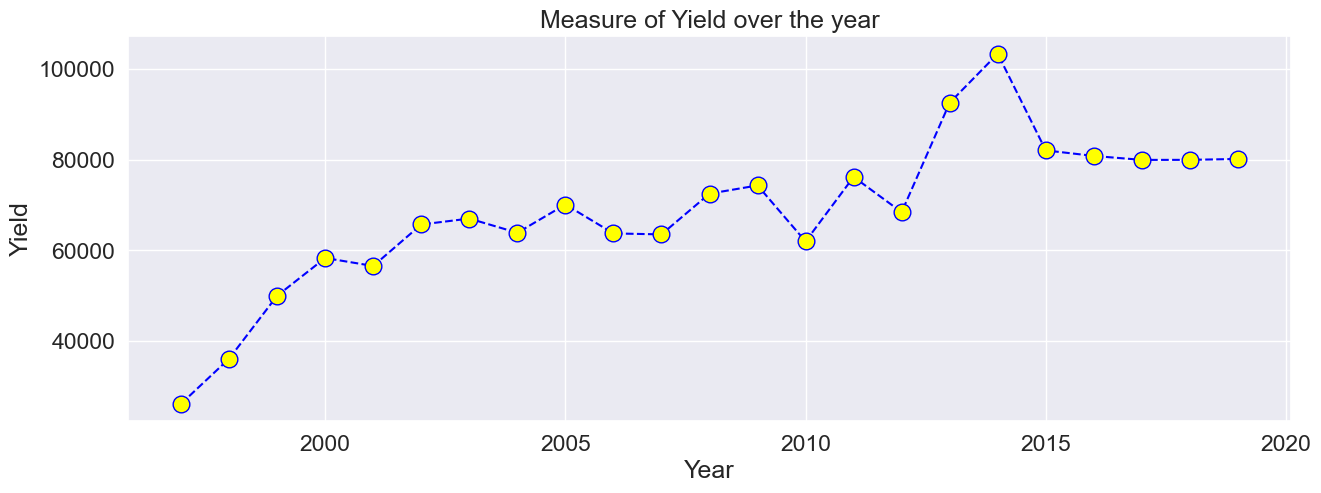

In [42]:
df_state = df.groupby('Crop_Year',as_index=False)['Yield'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Yield'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Measure of Yield over the year')
plt.show()

### Top 10 States by Total Yield

In [43]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Yield
29,West Bengal,291986.75
21,Puducherry,232163.60
0,Andhra Pradesh,229735.18
24,Tamil Nadu,185813.28
2,Assam,160612.65
12,Karnataka,151391.87
13,Kerala,147710.35
6,Goa,87275.96
25,Telangana,39508.73
7,Gujarat,5471.63


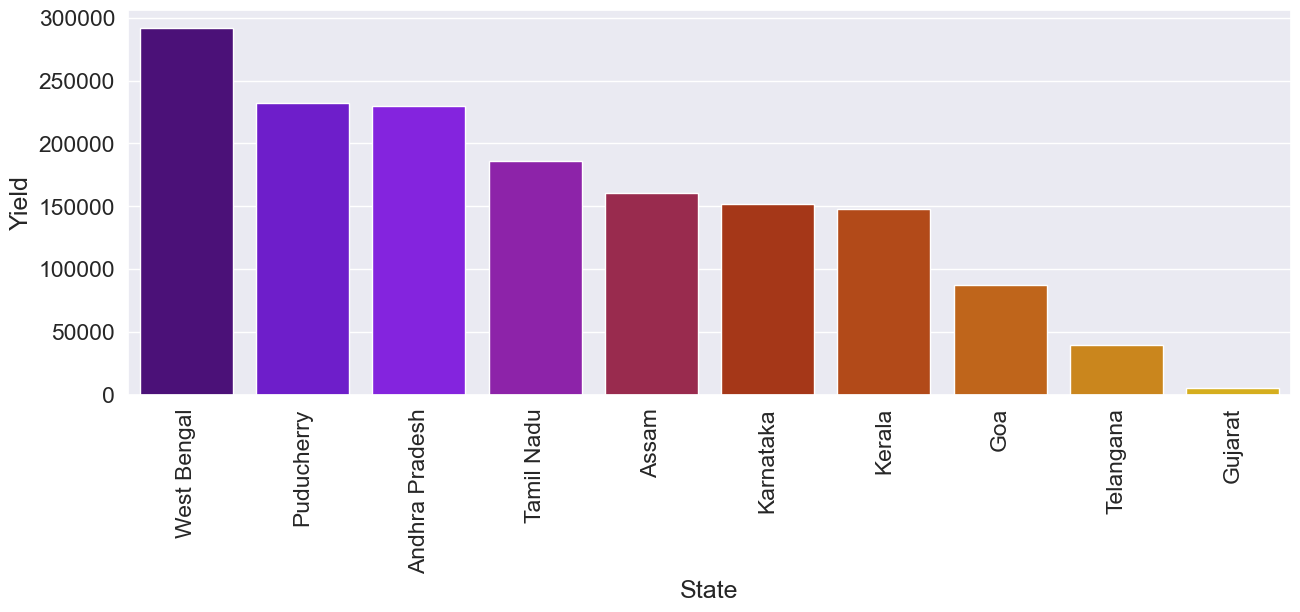

In [44]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Yield'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [45]:
df_state_sort = df.groupby('State',as_index=False)['Annual_Rainfall'].sum().sort_values(by='Annual_Rainfall', ascending=False)
df_state_sort

,State,Annual_Rainfall
17,Meghalaya,2623959.14
29,West Bengal,1883455.70
12,Karnataka,1692392.73
13,Kerala,1536641.30
2,Assam,1531493.36
0,Andhra Pradesh,1160139.90
4,Chhattisgarh,1159347.20
20,Odisha,1098412.40
19,Nagaland,1064884.45
3,Bihar,1042239.50


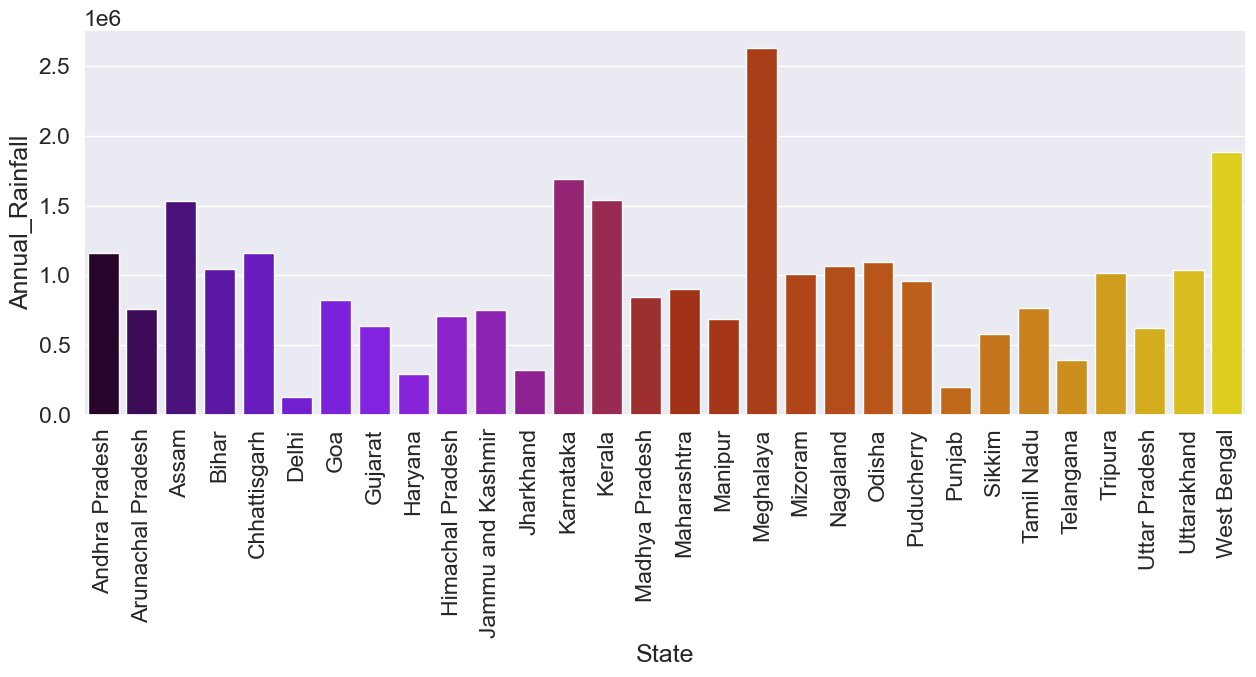

In [46]:
df_state = df.groupby('State',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

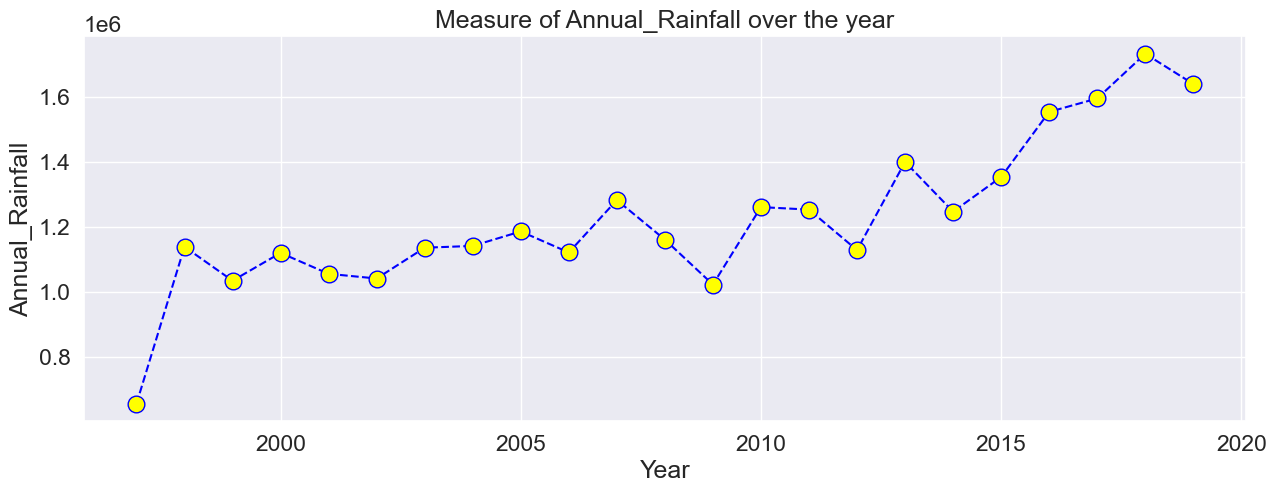

In [47]:
df_state = df.groupby('Crop_Year',as_index=False)['Annual_Rainfall'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Annual_Rainfall'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Annual_Rainfall')
plt.title('Measure of Annual_Rainfall over the year')
plt.show()

In [48]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Annual_Rainfall
17,Meghalaya,2623959.14
29,West Bengal,1883455.70
12,Karnataka,1692392.73
13,Kerala,1536641.30
2,Assam,1531493.36
0,Andhra Pradesh,1160139.90
4,Chhattisgarh,1159347.20
20,Odisha,1098412.40
19,Nagaland,1064884.45
3,Bihar,1042239.50


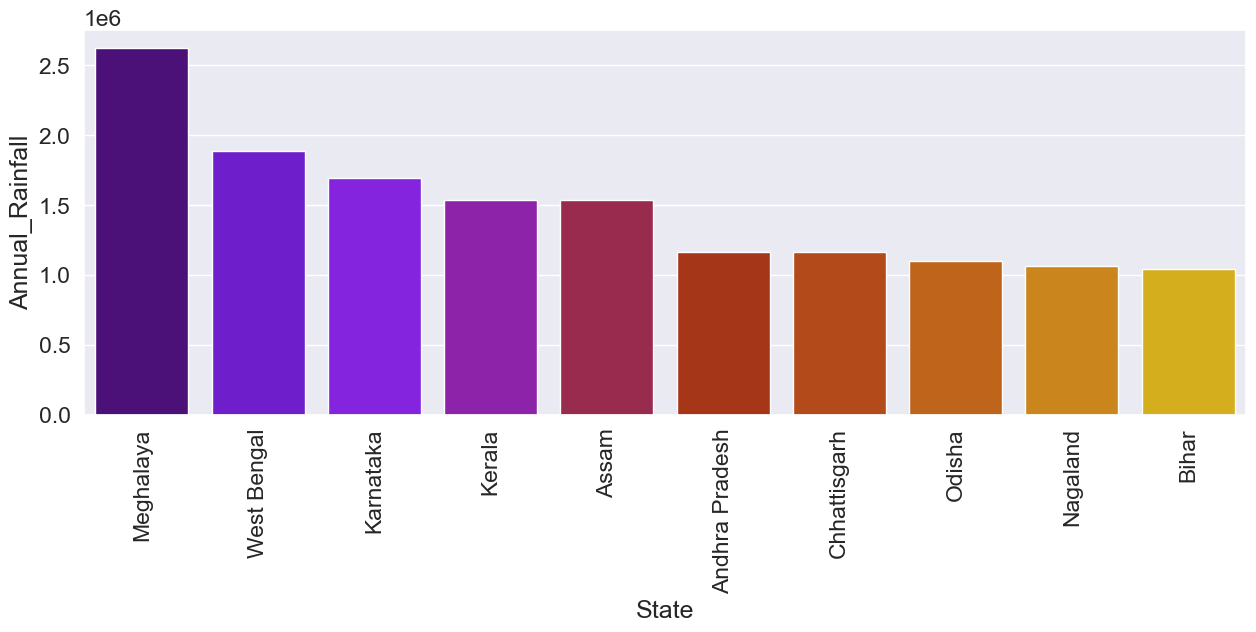

In [49]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Annual_Rainfall'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [50]:
df_state_sort = df.groupby('State',as_index=False)['Area'].sum().sort_values(by='Area', ascending=False)
df_state_sort

,State,Area
27,Uttar Pradesh,542672635.00
14,Madhya Pradesh,492087994.46
15,Maharashtra,461939552.15
12,Karnataka,257907399.00
0,Andhra Pradesh,238925335.00
29,West Bengal,237682264.87
7,Gujarat,222434333.20
3,Bihar,167995431.00
22,Punjab,162040200.00
8,Haryana,131506993.60


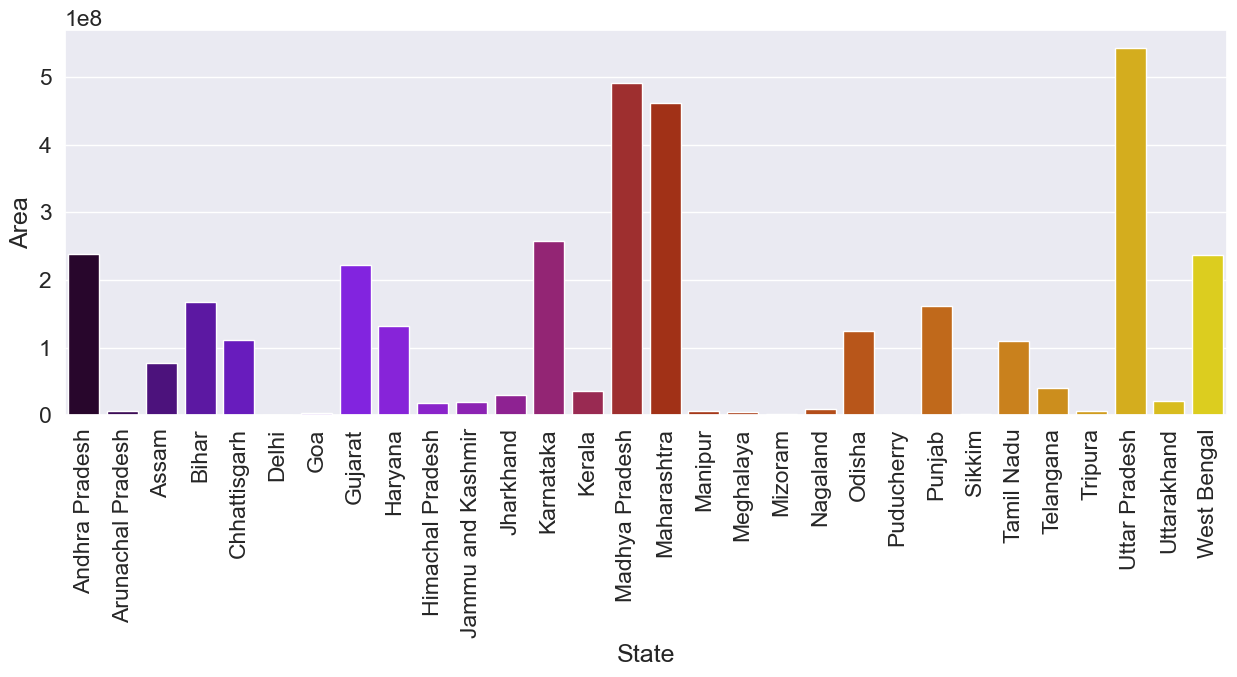

In [51]:
df_state = df.groupby('State',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

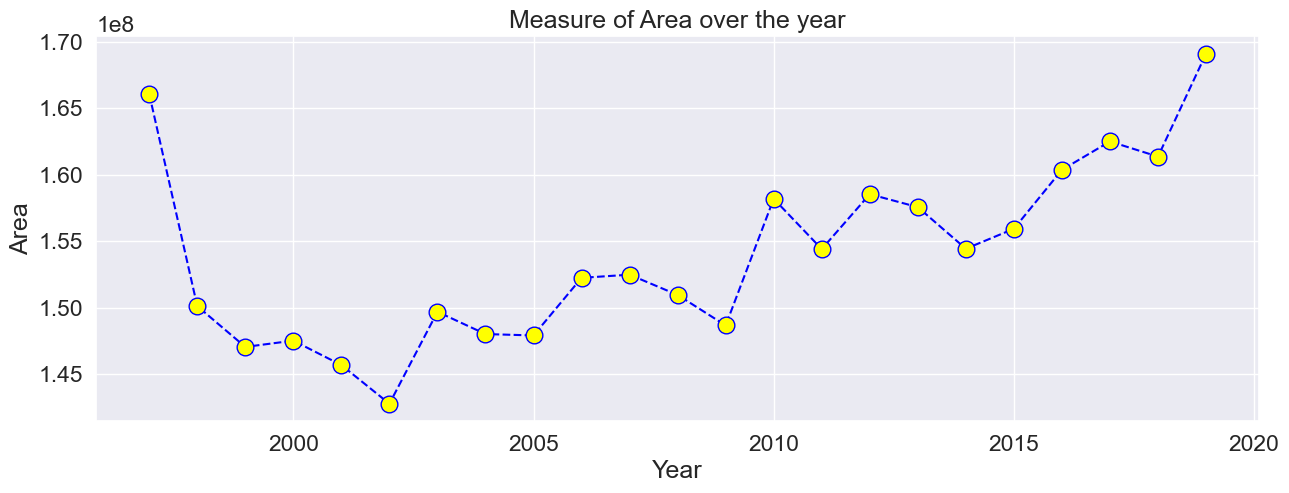

In [52]:
df_state = df.groupby('Crop_Year',as_index=False)['Area'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Area'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Area')
plt.title('Measure of Area over the year')
plt.show()

In [53]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Area
27,Uttar Pradesh,542672635.00
14,Madhya Pradesh,492087994.46
15,Maharashtra,461939552.15
12,Karnataka,257907399.00
0,Andhra Pradesh,238925335.00
29,West Bengal,237682264.87
7,Gujarat,222434333.20
3,Bihar,167995431.00
22,Punjab,162040200.00
8,Haryana,131506993.60


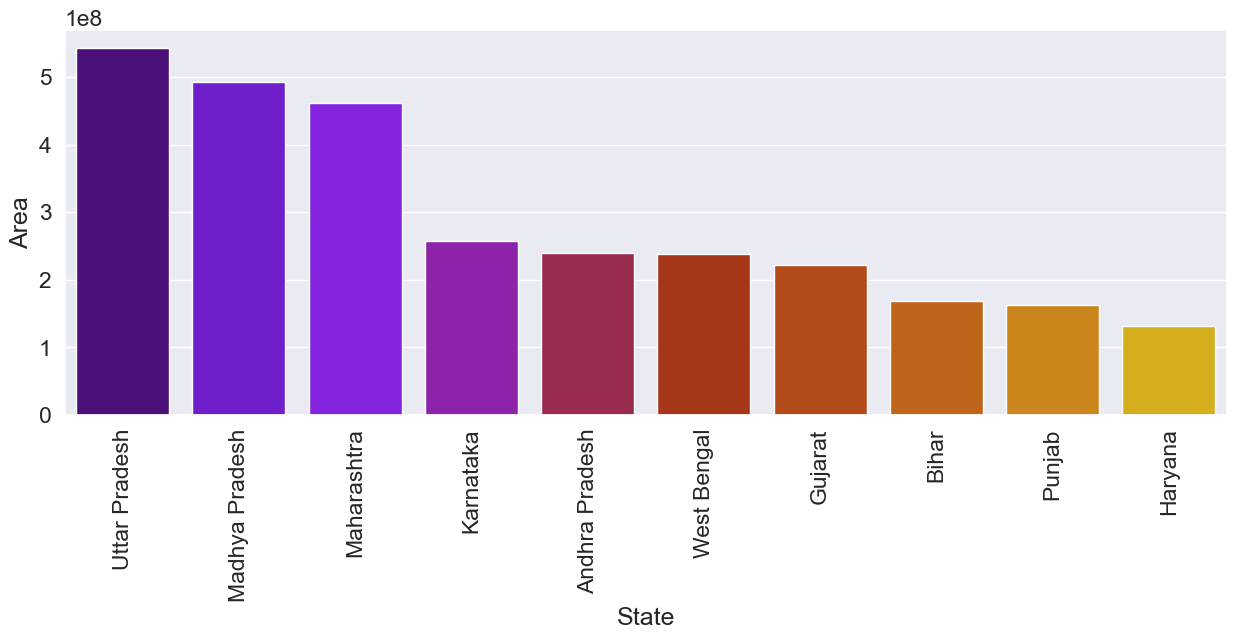

In [54]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Area'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [55]:
df_state_sort = df.groupby('State',as_index=False)['Production'].sum().sort_values(by='Production', ascending=False)
df_state_sort

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


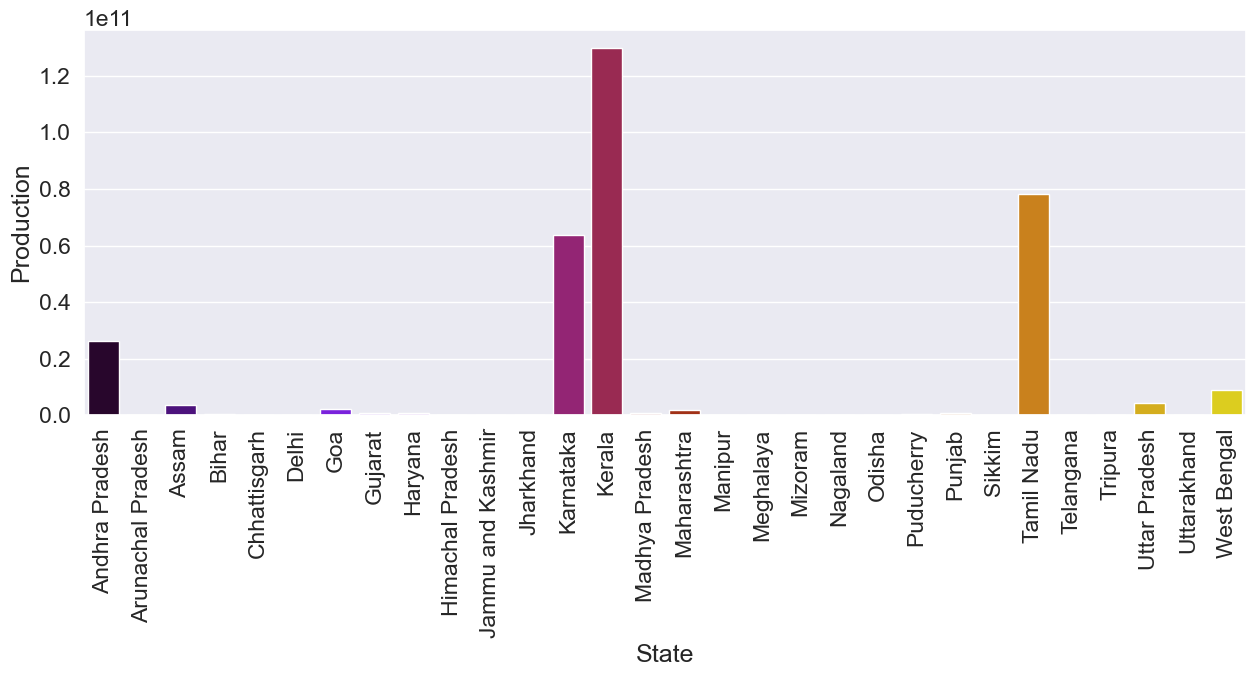

In [56]:
df_state = df.groupby('State',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

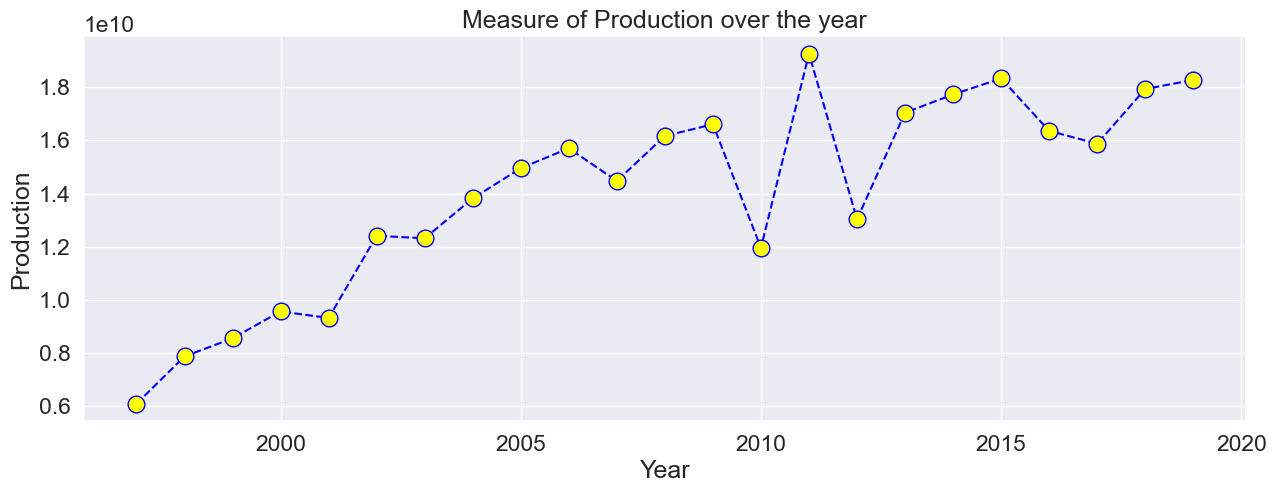

In [57]:
df_state = df.groupby('Crop_Year',as_index=False)['Production'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Production'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Measure of Production over the year')
plt.show()

In [58]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Production
13,Kerala,129700649853
24,Tamil Nadu,78051759253
12,Karnataka,63772797366
0,Andhra Pradesh,26076218605
29,West Bengal,8941179120
27,Uttar Pradesh,4442585302
2,Assam,3637714928
6,Goa,2193998349
15,Maharashtra,1878564915
14,Madhya Pradesh,834490323


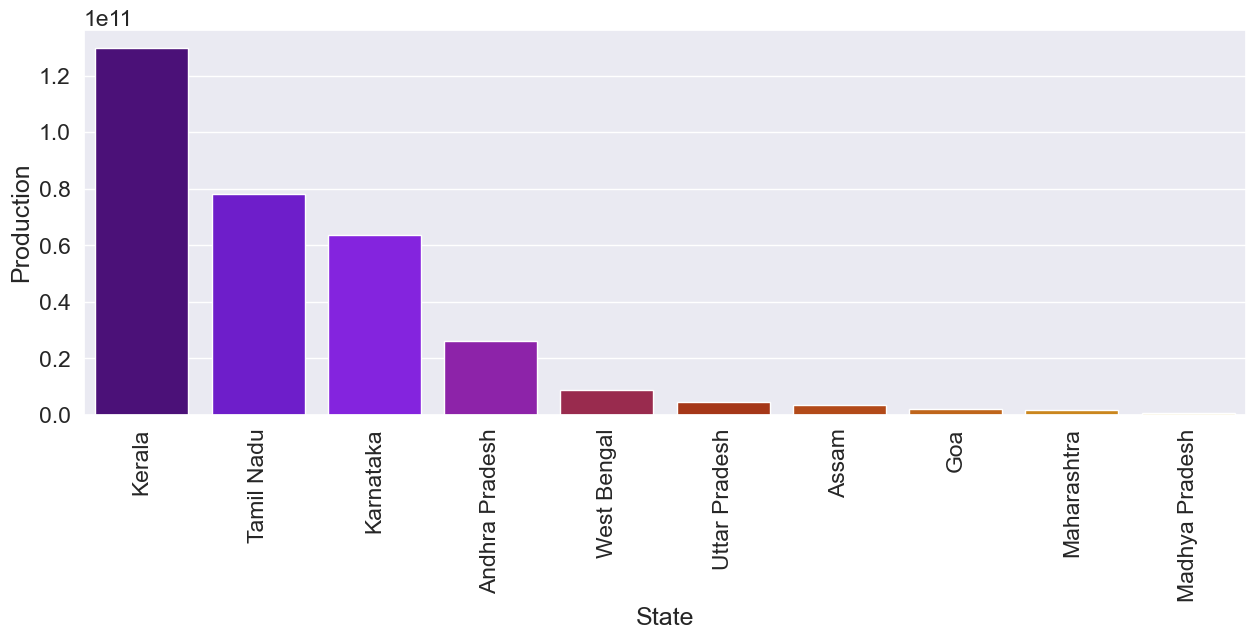

In [59]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Production'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [60]:
df_state_sort = df.groupby('State',as_index=False)['Fertilizer'].sum().sort_values(by='Fertilizer', ascending=False)
df_state_sort

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


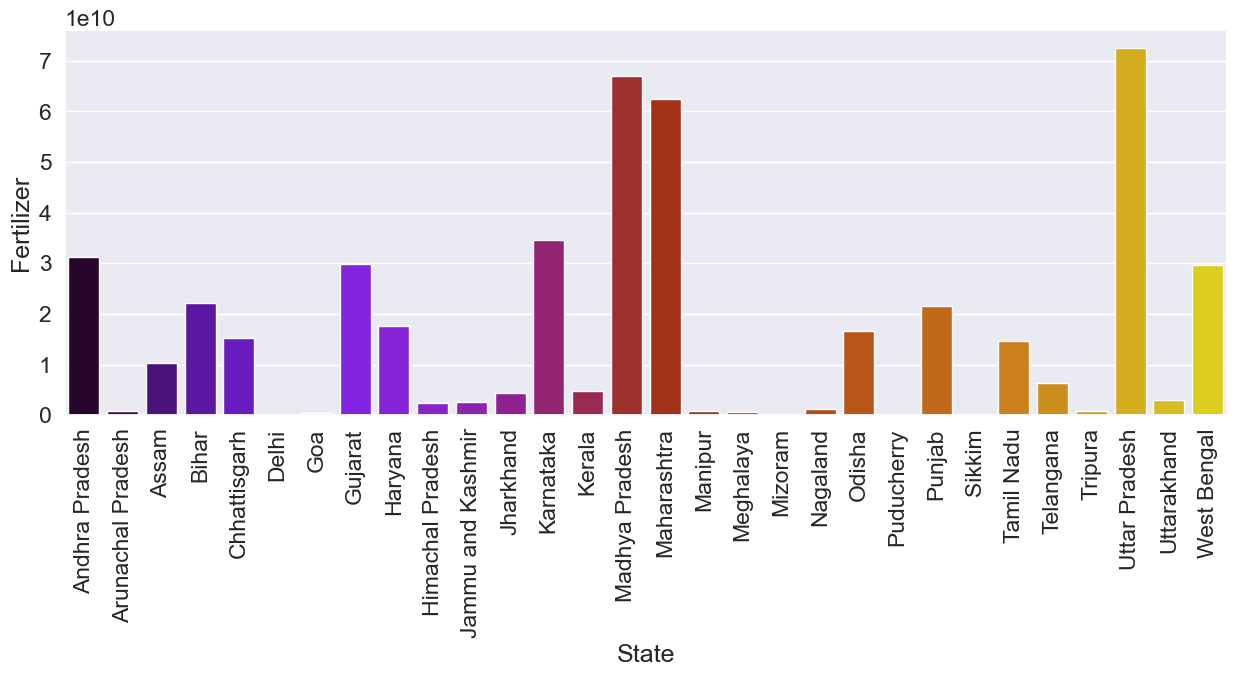

In [61]:
df_state = df.groupby('State',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

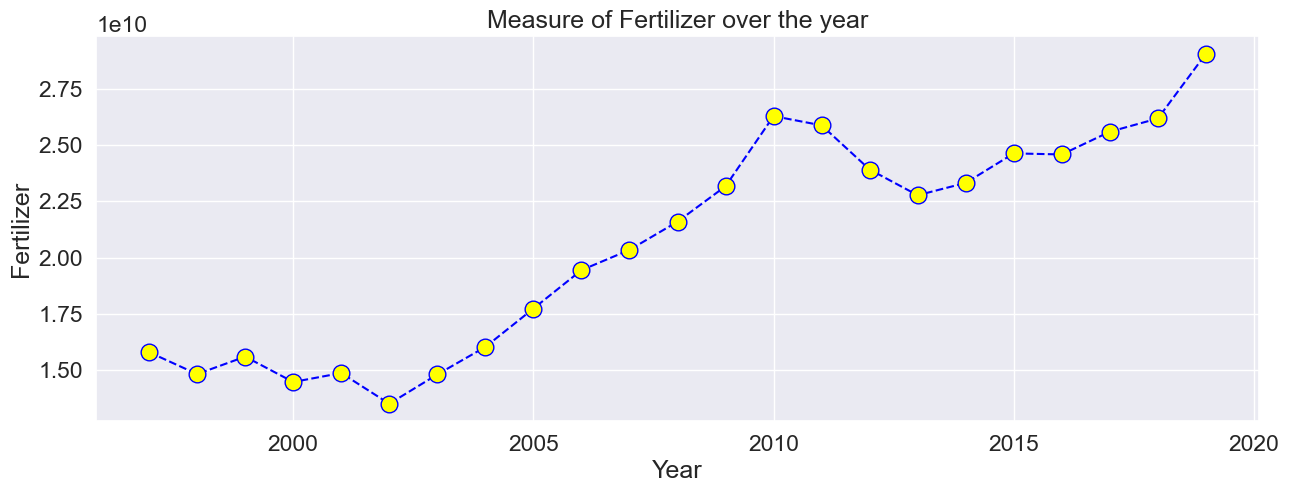

In [62]:
df_state = df.groupby('Crop_Year',as_index=False)['Fertilizer'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Fertilizer'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Fertilizer')
plt.title('Measure of Fertilizer over the year')
plt.show()

In [63]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Fertilizer
27,Uttar Pradesh,72452818301.10
14,Madhya Pradesh,67088002956.53
15,Maharashtra,62389066345.90
12,Karnataka,34580241907.79
0,Andhra Pradesh,31258901413.96
7,Gujarat,29930280998.95
29,West Bengal,29704801335.98
3,Bihar,22202119051.38
22,Punjab,21652297765.00
8,Haryana,17645132988.55


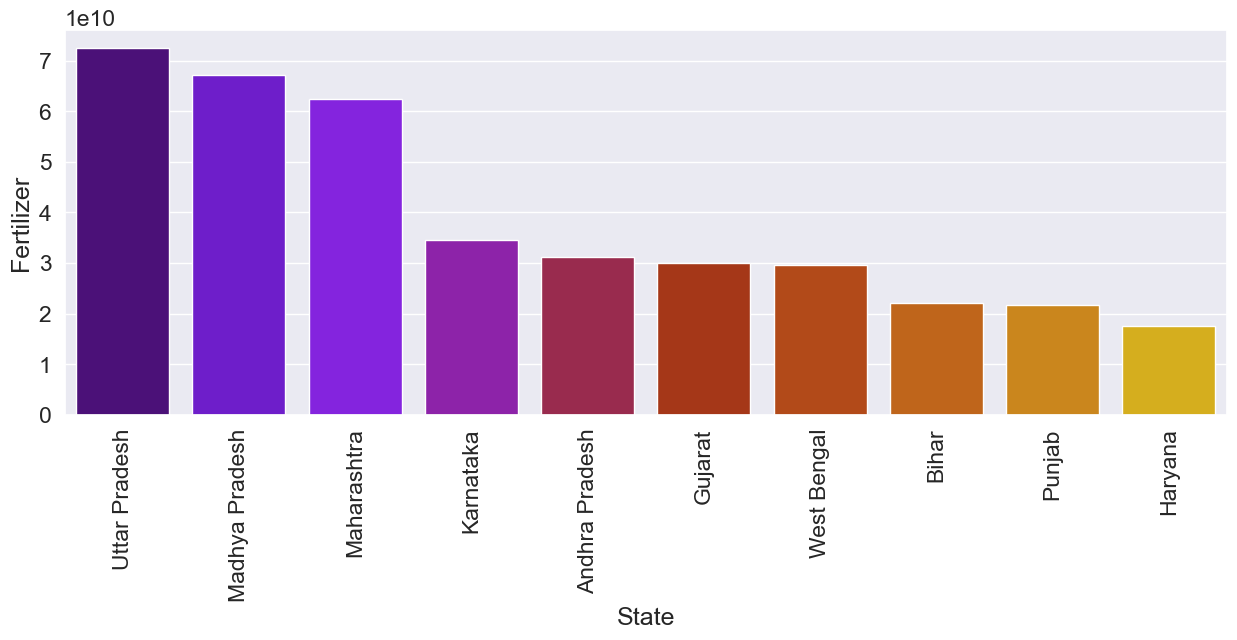

In [64]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Fertilizer'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

In [65]:
df_state_sort = df.groupby('State',as_index=False)['Pesticide'].sum().sort_values(by='Pesticide', ascending=False)
df_state_sort

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


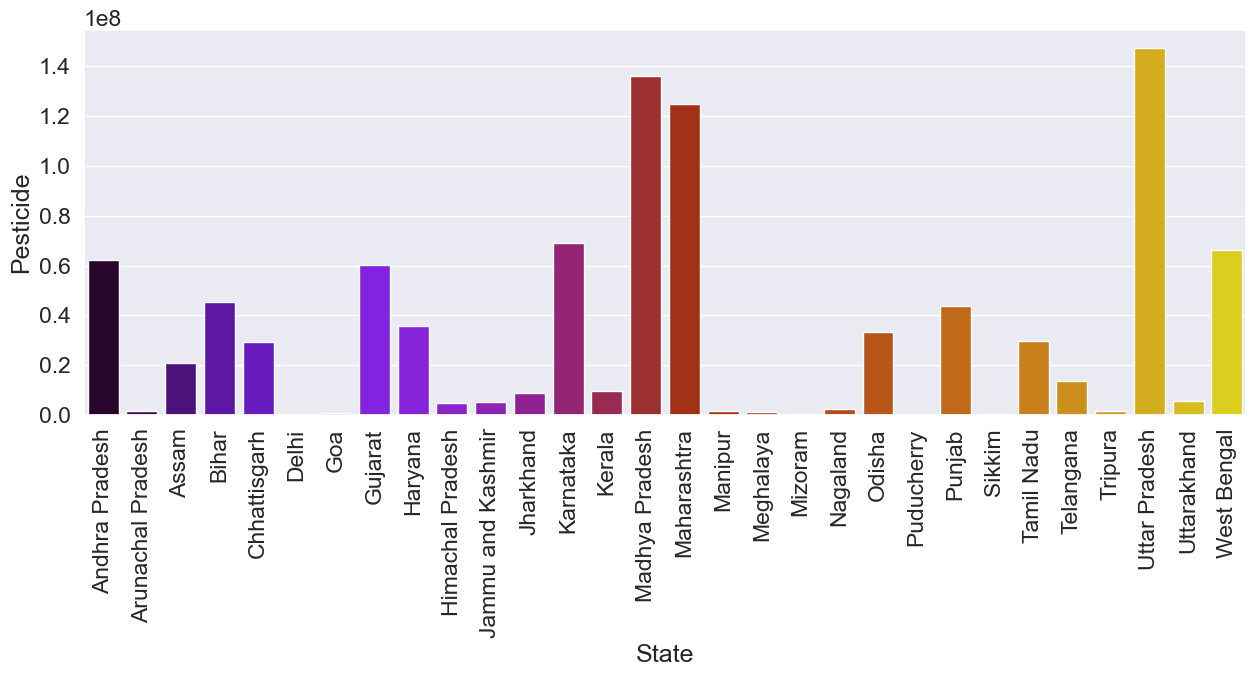

In [66]:
df_state = df.groupby('State',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
sns.barplot(x = df_state['State'], y=df_state['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

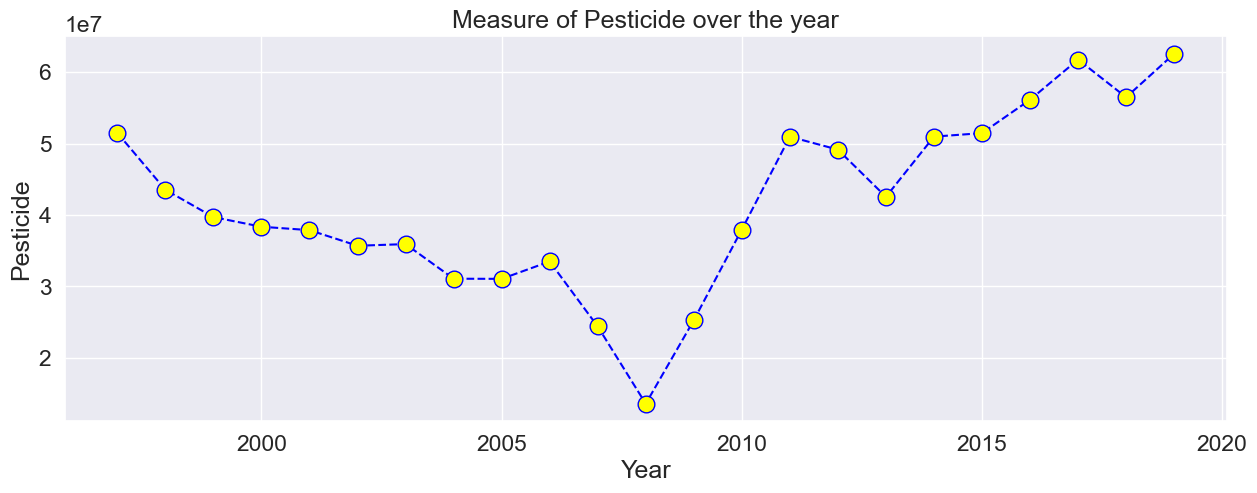

In [67]:
df_state = df.groupby('Crop_Year',as_index=False)['Pesticide'].sum()
plt.figure(figsize = (15,5))
plt.plot(df_state['Crop_Year'], df_state['Pesticide'],color='blue', linestyle='dashed', marker='o',markersize=12, markerfacecolor='yellow')
plt.xlabel('Year')
plt.ylabel('Pesticide')
plt.title('Measure of Pesticide over the year')
plt.show()

In [68]:
top_10_states = df_state_sort.head(10)
top_10_states

,State,Pesticide
27,Uttar Pradesh,147133481.22
14,Madhya Pradesh,135990782.02
15,Maharashtra,124688508.91
12,Karnataka,69173115.92
29,West Bengal,66126649.48
0,Andhra Pradesh,62107242.85
7,Gujarat,60067111.89
3,Bihar,45310803.07
22,Punjab,43752763.00
8,Haryana,35710255.77


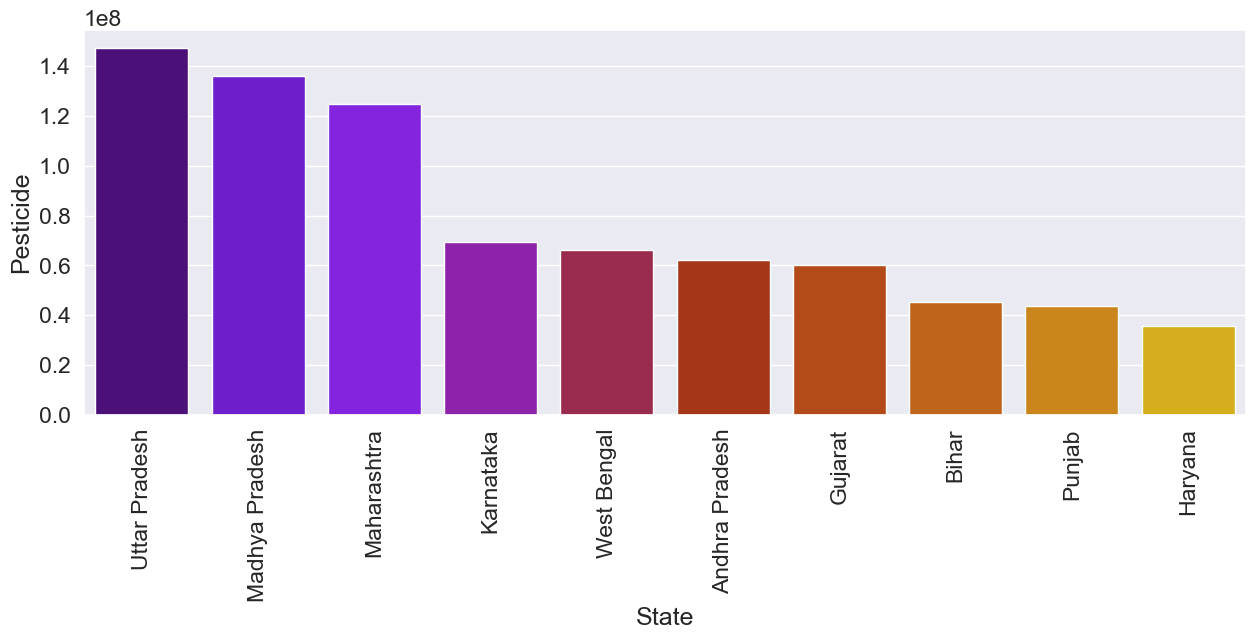

In [69]:
plt.figure(figsize = (15,5))
sns.barplot(x = top_10_states['State'], y=top_10_states['Pesticide'], palette = 'gnuplot')
plt.xticks(rotation = 90)
plt.show()

# Modelling without EDA

In [76]:
df_without_eda = df.copy()

In [77]:
df_without_eda.columns = df_without_eda.columns.str.lower()
df_without_eda.columns = (df_without_eda.columns.str.strip().str.lower().str.replace(" ", "_"))


In [78]:
for col in df_without_eda.select_dtypes(include="object").columns:
    df_without_eda[col] = df_without_eda[col].str.lower()

In [79]:
df_without_eda.head()

,crop,crop_year,season,state,area,production,annual_rainfall,fertilizer,pesticide,yield
0,arecanut,1997,whole year,assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,arhar/tur,1997,kharif,assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,castor seed,1997,kharif,assam,796.00,22,2051.40,75755.32,246.76,0.24
3,coconut,1997,whole year,assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,cotton(lint),1997,kharif,assam,1739.00,794,2051.40,165500.63,539.09,0.42


### One-Hot Encoding

In [80]:
category_columns = df_without_eda.select_dtypes(include = ['object']).columns
category_columns

Index(['crop', 'season', 'state'], dtype='object')

In [81]:
df_without_eda = pd.get_dummies(df_without_eda, columns = category_columns, drop_first=True)

In [82]:
df_without_eda.shape

(19652, 95)

In [84]:
boolean_cols_auto = df_without_eda.select_dtypes(include=['bool']).columns
df_without_eda[boolean_cols_auto] = df_without_eda[boolean_cols_auto].astype(int)

In [85]:
df_without_eda.head()

,crop_year,area,production,annual_rainfall,fertilizer,pesticide,yield,crop_arhar/tur,crop_bajra,crop_banana,crop_barley,crop_black pepper,crop_cardamom,crop_cashewnut,crop_castor seed,crop_coconut,crop_coriander,crop_cotton(lint),crop_cowpea(lobia),crop_dry chillies,crop_garlic,crop_ginger,crop_gram,crop_groundnut,crop_guar seed,crop_horse-gram,crop_jowar,crop_jute,crop_khesari,crop_linseed,crop_maize,crop_masoor,crop_mesta,crop_moong(green gram),crop_moth,crop_niger seed,crop_oilseeds total,crop_onion,crop_other rabi pulses,crop_other cereals,crop_other kharif pulses,crop_other oilseeds,crop_other summer pulses,crop_peas & beans (pulses),crop_potato,crop_ragi,crop_rapeseed &mustard,crop_rice,crop_safflower,crop_sannhamp,crop_sesamum,crop_small millets,crop_soyabean,crop_sugarcane,crop_sunflower,crop_sweet potato,crop_tapioca,crop_tobacco,crop_turmeric,crop_urad,crop_wheat,season_kharif,season_rabi,season_summer,season_whole year,season_winter,state_arunachal pradesh,state_assam,state_bihar,state_chhattisgarh,state_delhi,state_goa,state_gujarat,state_haryana,state_himachal pradesh,state_jammu and kashmir,state_jharkhand,state_karnataka,state_kerala,state_madhya pradesh,state_maharashtra,state_manipur,state_meghalaya,state_mizoram,state_nagaland,state_odisha,state_puducherry,state_punjab,state_sikkim,state_tamil nadu,state_telangana,state_tripura,state_uttar pradesh,state_uttarakhand,state_west bengal
0,1997,73814.00,56708,2051.40,7024878.38,22882.34,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1997,6637.00,4685,2051.40,631643.29,2057.47,0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1997,796.00,22,2051.40,75755.32,246.76,0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1997,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1997,1739.00,794,2051.40,165500.63,539.09,0.42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Split the data into dependent and independent variable

In [87]:
x = df_without_eda.drop(['yield'], axis = 1)
y = df_without_eda['yield']

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 94)
y_train - >   (15721,)
x_test  - >   (3931, 94)
y_test  - >   (3931,)


### Store performance metrices in the list

In [90]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

### Create a function for evaluate model

In [91]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2) 
    testing_scores_rmse.append(test_rmse) 
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

# Linear Regression

In [92]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 84.92%, Adjusted R² = 84.83%, RMSE = 345.8348
Testing Data : R² = 81.35%, Adjusted R² = 80.89%, RMSE = 358.9635



# Ridge Regression

In [93]:
evaluate_model_performance(
    model=Ridge(alpha=1.0),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 84.91%, Adjusted R² = 84.82%, RMSE = 345.9536
Testing Data : R² = 81.45%, Adjusted R² = 81.00%, RMSE = 357.9658



# Lasso Regression

In [94]:
evaluate_model_performance(
    model=Lasso(alpha=0.1),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 84.91%, Adjusted R² = 84.81%, RMSE = 346.0390
Testing Data : R² = 81.35%, Adjusted R² = 80.89%, RMSE = 358.9522



# ElasticNet Regression

In [95]:
evaluate_model_performance(
    model=ElasticNet(alpha=0.1, l1_ratio=0.5),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 43.07%, Adjusted R² = 42.72%, RMSE = 672.0466
Testing Data : R² = 49.18%, Adjusted R² = 47.94%, RMSE = 592.5247



# DecisionTree

In [96]:
evaluate_model_performance(
    model=DecisionTreeRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0000
Testing Data : R² = 94.94%, Adjusted R² = 94.82%, RMSE = 186.8954



# RandomForest

In [97]:
evaluate_model_performance(
    model=RandomForestRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.64%, Adjusted R² = 99.64%, RMSE = 53.5573
Testing Data : R² = 98.67%, Adjusted R² = 98.63%, RMSE = 95.9550



# AdaBoost

In [98]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 95.83%, Adjusted R² = 95.80%, RMSE = 181.9097
Testing Data : R² = 94.13%, Adjusted R² = 93.99%, RMSE = 201.3949



# GradientBoost

In [99]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 99.72%, Adjusted R² = 99.71%, RMSE = 47.4115
Testing Data : R² = 98.35%, Adjusted R² = 98.31%, RMSE = 106.8121



# LGBM

In [100]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1471
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 93
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 97.76%, Adjusted R² = 97.75%, RMSE = 133.2447
Testing Data : R² = 95.88%, Adjusted R² = 95.78%, RMSE = 168.7017



# XGB

In [101]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 1.5815
Testing Data : R² = 98.41%, Adjusted R² = 98.37%, RMSE = 104.8998



# CatBoost

In [102]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.98%, Adjusted R² = 99.98%, RMSE = 12.0639
Testing Data : R² = 98.08%, Adjusted R² = 98.04%, RMSE = 115.0786



### K-Nearest Neighbors

In [103]:
evaluate_model_performance(
    model=KNeighborsRegressor(),
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 94.44%, Adjusted R² = 94.41%, RMSE = 210.0357
Testing Data : R² = 93.43%, Adjusted R² = 93.26%, RMSE = 213.1140



# Ensemble Methods

In [104]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data: R² = 95.98%, Adjusted R² = 95.96%, RMSE = 178.5413
Testing Data : R² = 94.48%, Adjusted R² = 94.35%, RMSE = 195.2758



In [105]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=42)

# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,          # Number of base estimators
    max_samples=0.8,          # Fraction of samples to use for each base estimator
    max_features=0.8,         # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                 # Use all available cores
)

evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data: R² = 99.45%, Adjusted R² = 99.44%, RMSE = 66.2261
Testing Data : R² = 98.36%, Adjusted R² = 98.32%, RMSE = 106.5122



In [108]:
# Define base models (level-0)
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

# Define the meta-model (level-1)
meta_model = KNeighborsRegressor()

# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,  # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1               # Use all available cores
)

evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 99.12%, Adjusted R² = 99.12%, RMSE = 83.4422
Testing Data : R² = 98.94%, Adjusted R² = 98.91%, RMSE = 85.6840



# Model comparison

In [110]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })
				   
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
14,Stacking Regressor,99.12,99.12,83.44,98.94,98.91,85.68
5,Random Forest,99.64,99.64,53.56,98.67,98.63,95.95
9,XGBoost,100.00,100.00,1.58,98.41,98.37,104.90
13,Bagging Regressor,99.45,99.44,66.23,98.36,98.32,106.51
7,Gradient Boost,99.72,99.71,47.41,98.35,98.31,106.81
10,CatBoost,99.98,99.98,12.06,98.08,98.04,115.08
8,LGBM,97.76,97.75,133.24,95.88,95.78,168.70
4,Decision Tree,100.00,100.00,0.00,94.94,94.82,186.90
12,Voting Regressor,95.98,95.96,178.54,94.48,94.35,195.28
6,Ada Boost,95.83,95.80,181.91,94.13,93.99,201.39


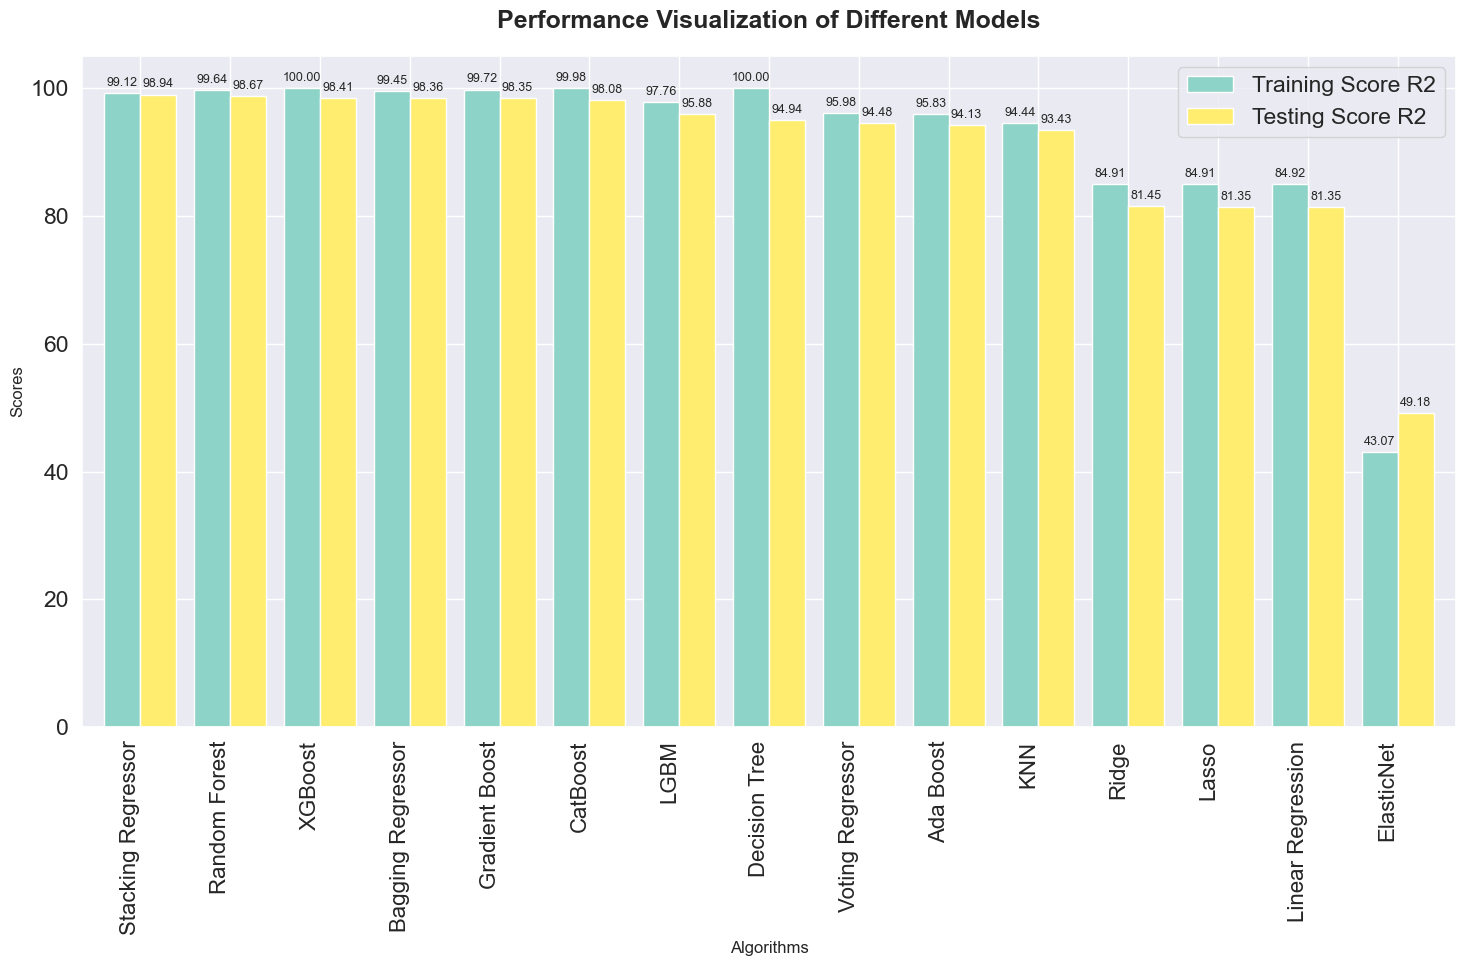

In [112]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(15, 10),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)

plt.tight_layout()
plt.show()

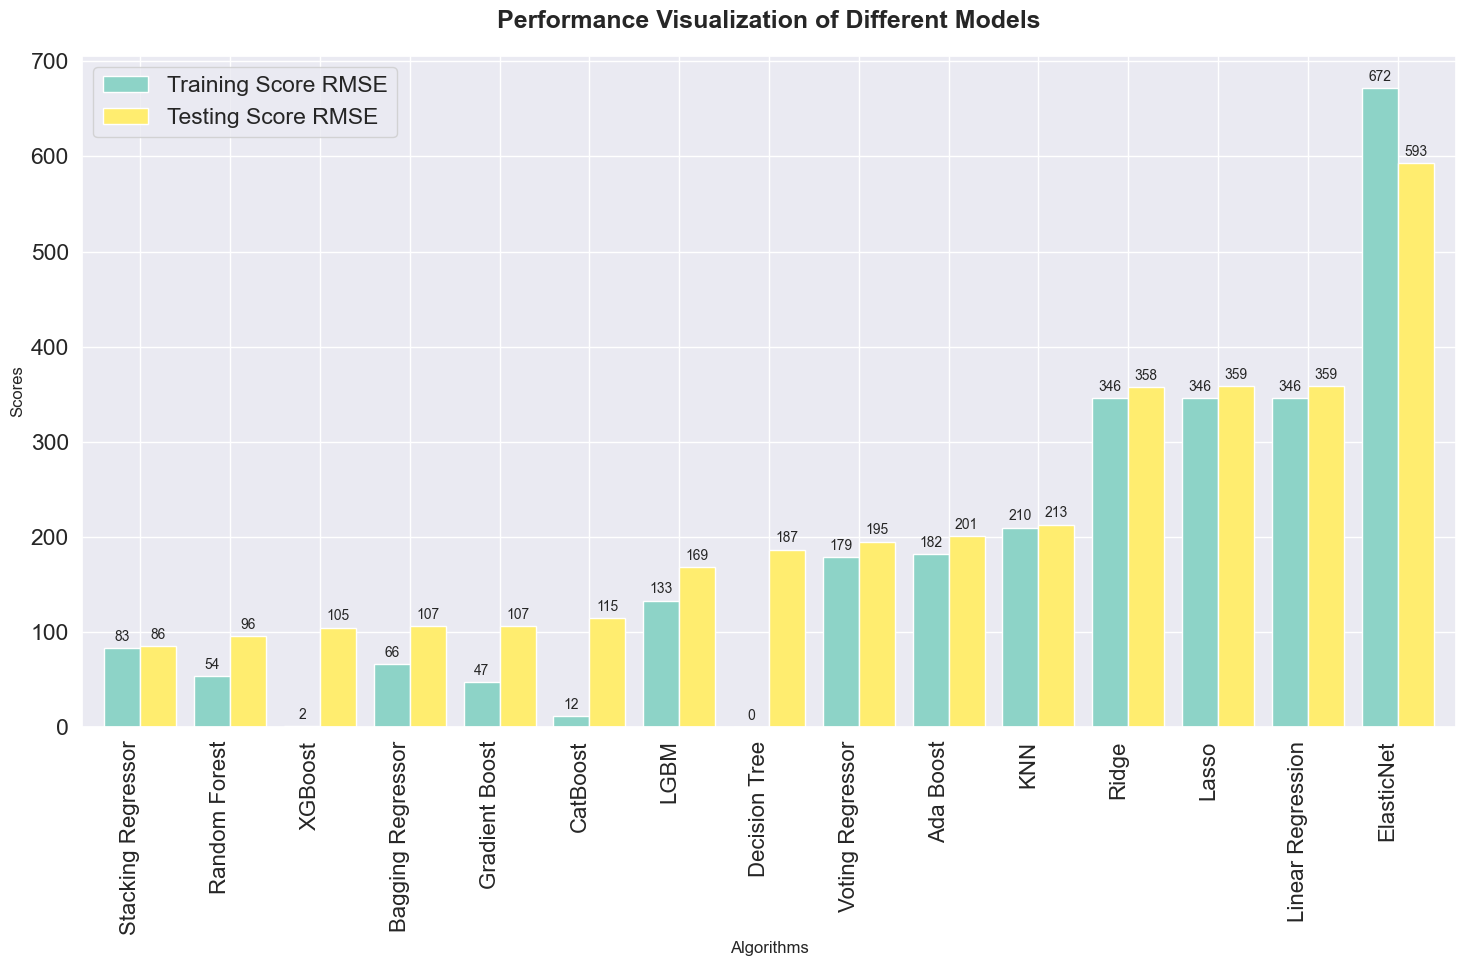

In [115]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(15, 10),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

# Modelling after EDA

In [117]:
df_with_eda = df.copy()
df_with_eda.columns = df_with_eda.columns.str.lower()
df_with_eda.columns = (df_with_eda.columns.str.strip().str.lower().str.replace(" ", "_"))

for col in df_with_eda.select_dtypes(include="object").columns:
    df_with_eda[col] = df_with_eda[col].str.lower()

df_with_eda.head()

,crop,crop_year,season,state,area,production,annual_rainfall,fertilizer,pesticide,yield
0,arecanut,1997,whole year,assam,73814.00,56708,2051.40,7024878.38,22882.34,0.80
1,arhar/tur,1997,kharif,assam,6637.00,4685,2051.40,631643.29,2057.47,0.71
2,castor seed,1997,kharif,assam,796.00,22,2051.40,75755.32,246.76,0.24
3,coconut,1997,whole year,assam,19656.00,126905000,2051.40,1870661.52,6093.36,5238.05
4,cotton(lint),1997,kharif,assam,1739.00,794,2051.40,165500.63,539.09,0.42


### Drop 'Area' and 'Production' columns

By directly including both Production and Area as features in the model to predict Yield, we are essentially giving the model the exact answer since it only needs to divide Production by Area. This defeats the purpose of using the model to predict Yield, as the relationship becomes trivial for the model to learn.

In [127]:

df_with_eda = df_with_eda.drop(['area', 'production'], axis=1)

In [128]:
df_with_eda.head()

,crop,crop_year,season,state,annual_rainfall,fertilizer,pesticide,yield
0,arecanut,1997,whole year,assam,2051.40,7024878.38,22882.34,0.80
1,arhar/tur,1997,kharif,assam,2051.40,631643.29,2057.47,0.71
2,castor seed,1997,kharif,assam,2051.40,75755.32,246.76,0.24
3,coconut,1997,whole year,assam,2051.40,1870661.52,6093.36,5238.05
4,cotton(lint),1997,kharif,assam,2051.40,165500.63,539.09,0.42


### Check skewness for each column

In [118]:

skewness = df_with_eda[['annual_rainfall','fertilizer','pesticide']].skew().sort_values()
skewness

annual_rainfall    2.13
fertilizer        13.40
pesticide         25.61
dtype: float64

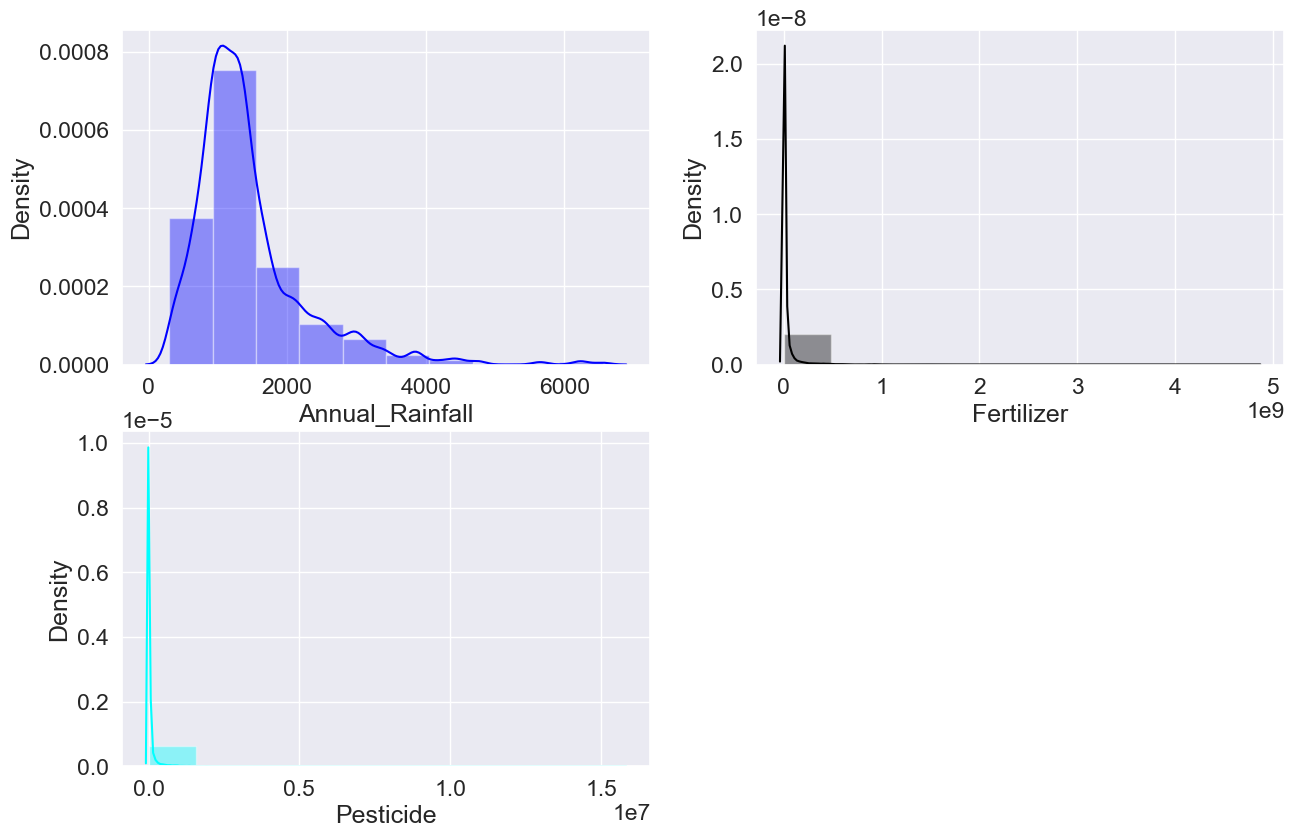

In [120]:
# To check the distribution of dataset
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.distplot(numeric_data['Annual_Rainfall'],bins = 10,color = 'blue')
plt.subplot(4,2,2)
sns.distplot(numeric_data['Fertilizer'],bins = 10, color = 'black')
plt.subplot(4,2,3)
sns.distplot(numeric_data['Pesticide'],bins = 10, color = 'cyan')
plt.show()

### Variance Inflation Factor

In [129]:
df_with_eda.head()

,crop,crop_year,season,state,annual_rainfall,fertilizer,pesticide,yield
0,arecanut,1997,whole year,assam,2051.40,7024878.38,22882.34,0.80
1,arhar/tur,1997,kharif,assam,2051.40,631643.29,2057.47,0.71
2,castor seed,1997,kharif,assam,2051.40,75755.32,246.76,0.24
3,coconut,1997,whole year,assam,2051.40,1870661.52,6093.36,5238.05
4,cotton(lint),1997,kharif,assam,2051.40,165500.63,539.09,0.42


In [131]:
exclude_column = ['crop','crop_year','season','state','yield']
vif_columns = [col for col in df_with_eda.columns if col not in exclude_column]

vif1 = df_with_eda[vif_columns].copy()
vif1.head()

,annual_rainfall,fertilizer,pesticide
0,2051.40,7024878.38,22882.34
1,2051.40,631643.29,2057.47
2,2051.40,75755.32,246.76
3,2051.40,1870661.52,6093.36
4,2051.40,165500.63,539.09


In [132]:
variable = vif1
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
1,12.00,fertilizer
2,11.95,pesticide
0,1.03,annual_rainfall


VIF of the independent columns should be less than 10 to remove multicollinearity

In [135]:
vif2 = vif1.copy()
vif2.drop(['fertilizer'], axis = 1, inplace=True)
exclude_column = ['crop','crop_year','season','state','yield']
vif_columns = [col for col in vif2.columns if col not in exclude_column]
variable = vif2
vif = pd.DataFrame()
vif['Variance Inflation Factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]
vif['Features'] = vif_columns
vif.sort_values(by="Variance Inflation Factor", ascending=False)

,Variance Inflation Factor,Features
0,1.02,annual_rainfall
1,1.02,pesticide


Variance Inflation Factor (VIF) was checked, but no features were removed because the model achieved good accuracy without removing any features

### One-Hot Encoding

In [136]:
df_with_eda_encoding = df_with_eda.copy()
df_with_eda_encoding = df_with_eda_encoding.drop(['crop_year'], axis = 1)
df_with_eda_encoding = df_with_eda_encoding.drop(['fertilizer'], axis = 1)
df_with_eda_encoding.head()

,crop,season,state,annual_rainfall,pesticide,yield
0,arecanut,whole year,assam,2051.40,22882.34,0.80
1,arhar/tur,kharif,assam,2051.40,2057.47,0.71
2,castor seed,kharif,assam,2051.40,246.76,0.24
3,coconut,whole year,assam,2051.40,6093.36,5238.05
4,cotton(lint),kharif,assam,2051.40,539.09,0.42


In [138]:
category_columns = df_with_eda_encoding.select_dtypes(include = ['object']).columns
df_with_eda_encoding = pd.get_dummies(df_with_eda_encoding, columns = category_columns, drop_first=True)
boolean_cols_auto = df_with_eda_encoding.select_dtypes(include=['bool']).columns
df_with_eda_encoding[boolean_cols_auto] = df_with_eda_encoding[boolean_cols_auto].astype(int)
df_with_eda_encoding.head()

,annual_rainfall,pesticide,yield,crop_arhar/tur,crop_bajra,crop_banana,crop_barley,crop_black pepper,crop_cardamom,crop_cashewnut,crop_castor seed,crop_coconut,crop_coriander,crop_cotton(lint),crop_cowpea(lobia),crop_dry chillies,crop_garlic,crop_ginger,crop_gram,crop_groundnut,crop_guar seed,crop_horse-gram,crop_jowar,crop_jute,crop_khesari,crop_linseed,crop_maize,crop_masoor,crop_mesta,crop_moong(green gram),crop_moth,crop_niger seed,crop_oilseeds total,crop_onion,crop_other rabi pulses,crop_other cereals,crop_other kharif pulses,crop_other oilseeds,crop_other summer pulses,crop_peas & beans (pulses),crop_potato,crop_ragi,crop_rapeseed &mustard,crop_rice,crop_safflower,crop_sannhamp,crop_sesamum,crop_small millets,crop_soyabean,crop_sugarcane,crop_sunflower,crop_sweet potato,crop_tapioca,crop_tobacco,crop_turmeric,crop_urad,crop_wheat,season_kharif,season_rabi,season_summer,season_whole year,season_winter,state_arunachal pradesh,state_assam,state_bihar,state_chhattisgarh,state_delhi,state_goa,state_gujarat,state_haryana,state_himachal pradesh,state_jammu and kashmir,state_jharkhand,state_karnataka,state_kerala,state_madhya pradesh,state_maharashtra,state_manipur,state_meghalaya,state_mizoram,state_nagaland,state_odisha,state_puducherry,state_punjab,state_sikkim,state_tamil nadu,state_telangana,state_tripura,state_uttar pradesh,state_uttarakhand,state_west bengal
0,2051.40,22882.34,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2051.40,2057.47,0.71,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2051.40,246.76,0.24,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2051.40,6093.36,5238.05,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2051.40,539.09,0.42,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
x = df_with_eda_encoding.drop(['yield'], axis = 1)
y = df_with_eda_encoding['yield']

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [142]:
print("x_train - >  ",x_train.shape)
print("y_train - >  ",y_train.shape)
print("x_test  - >  ",x_test.shape)
print("y_test  - >  ",y_test.shape)

x_train - >   (15721, 90)
y_train - >   (15721,)
x_test  - >   (3931, 90)
y_test  - >   (3931,)


### Transformation using the method 'Yeo-Johnson'

In [143]:
pt = PowerTransformer(method='yeo-johnson')

In [144]:
x_train_scaled = pt.fit_transform(x_train)
x_test_scaled = pt.transform(x_test)

### Storing the performence metrics score

In [145]:
training_scores_r2 = []
training_scores_adj_r2 = []
training_scores_rmse = []

testing_scores_r2 = []
testing_scores_adj_r2 = []
testing_scores_rmse = []

In [146]:
def evaluate_model_performance(model, x_train, y_train, x_test, y_test):
    """
    Evaluates R², Adjusted R², and RMSE of a given model on training and testing data.
    
    Parameters:
    - model: The machine learning model to evaluate
    - x_train: Training feature set
    - y_train: Training target values
    - x_test: Testing feature set
    - y_test: Testing target values
    - training_scores: List to store training R² scores
    - testing_scores: List to store testing R² scores
    """
    # Fit the model
    model.fit(x_train, y_train)
    
    # Predictions for training and testing data
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred) * 100
    test_r2 = r2_score(y_test, y_test_pred) * 100
    
    # Calculate Adjusted R² scores
    n_train, p_train = x_train.shape
    n_test, p_test = x_test.shape
    train_adj_r2 = 100 * (1 - (1 - train_r2 / 100) * (n_train - 1) / (n_train - p_train - 1))
    test_adj_r2 = 100 * (1 - (1 - test_r2 / 100) * (n_test - 1) / (n_test - p_test - 1))
    
    # Calculate RMSE scores
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Append scores to respective lists
    training_scores_r2.append(train_r2)
    training_scores_adj_r2.append(train_adj_r2)
    training_scores_rmse.append(train_rmse)
    testing_scores_r2.append(test_r2)
    testing_scores_adj_r2.append(test_adj_r2) 
    testing_scores_rmse.append(test_rmse) 
    
    # Display scores
    print(f"{model.__class__.__name__} Performance Metrics:")
    print(f"Training Data: R² = {train_r2:.2f}%, Adjusted R² = {train_adj_r2:.2f}%, RMSE = {train_rmse:.4f}")
    print(f"Testing Data : R² = {test_r2:.2f}%, Adjusted R² = {test_adj_r2:.2f}%, RMSE = {test_rmse:.4f}\n")

### Linear Regression

In [147]:
evaluate_model_performance(
    model=LinearRegression(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

LinearRegression Performance Metrics:
Training Data: R² = 84.82%, Adjusted R² = 84.73%, RMSE = 347.0002
Testing Data : R² = 81.87%, Adjusted R² = 81.45%, RMSE = 353.8658



### Ridge Regression

In [149]:
# Create the Ridge Regression model
ridge_regressor = Ridge(
    alpha=1.0,                  # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=None,              # Maximum number of iterations for the solver
    tol=0.001,                  # Tolerance for stopping criteria
    solver='auto',              # Solver to use ('auto', 'lsqr', 'saga', etc.)
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [150]:
evaluate_model_performance(
    model=ridge_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Ridge Performance Metrics:
Training Data: R² = 84.82%, Adjusted R² = 84.73%, RMSE = 347.0002
Testing Data : R² = 81.87%, Adjusted R² = 81.45%, RMSE = 353.8651



### Lasso Regression

In [151]:
# Create the Lasso Regression model
lasso_regressor = Lasso(
    alpha=1.0,                  # Regularization strength
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.0001,                 # Tolerance for stopping criteria
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [152]:
evaluate_model_performance(
    model=lasso_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

Lasso Performance Metrics:
Training Data: R² = 84.80%, Adjusted R² = 84.71%, RMSE = 347.2556
Testing Data : R² = 81.85%, Adjusted R² = 81.43%, RMSE = 354.0883



### ElasticNet Regression

In [153]:
# Create the ElasticNet Regression model
elasticnet_regressor = ElasticNet(
    alpha=1.0,                  # Regularization strength
    l1_ratio=0.5,               # The balance between Lasso (L1) and Ridge (L2) regularization (0 is Ridge, 1 is Lasso)
    fit_intercept=True,         # Whether to calculate the intercept (bias) term
    copy_X=True,                # If True, it makes a copy of the input matrix X
    max_iter=1000,              # Maximum number of iterations for the solver
    tol=0.0001,                 # Tolerance for stopping criteria
    random_state=None,          # Random state for reproducibility
    positive=False              # If True, coefficients are constrained to be positive
)

In [154]:
evaluate_model_performance(
    model=elasticnet_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

ElasticNet Performance Metrics:
Training Data: R² = 75.54%, Adjusted R² = 75.40%, RMSE = 440.5166
Testing Data : R² = 72.88%, Adjusted R² = 72.25%, RMSE = 432.8184



### Decision Tree 

In [155]:
# Create the DecisionTree Regressor model
decision_tree_regressor = DecisionTreeRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    splitter='best',              # Strategy used to split at each node
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features=None,            # The number of features to consider when looking for the best split
    random_state=42,              # Controls the randomness for reproducibility
    max_leaf_nodes=None,          # Grow a tree with a maximum number of leaf nodes
    min_impurity_decrease=0.0,    # Minimum impurity decrease required to make a further split
    ccp_alpha=0.0                # Complexity parameter used for Minimal Cost-Complexity Pruning
)

In [156]:
evaluate_model_performance(
    model=decision_tree_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

DecisionTreeRegressor Performance Metrics:
Training Data: R² = 100.00%, Adjusted R² = 100.00%, RMSE = 0.0019
Testing Data : R² = 96.46%, Adjusted R² = 96.38%, RMSE = 156.4167



### Random Forest

In [157]:
# Create the RandomForest Regressor model
random_forest_regressor = RandomForestRegressor(
    criterion='squared_error',    # Updated to 'squared_error' for mean squared error
    n_estimators=100,             # Number of trees in the forest
    max_depth=None,               # Maximum depth of the tree
    min_samples_split=2,          # Minimum number of samples required to split an internal node
    min_samples_leaf=1,           # Minimum number of samples required to be at a leaf node
    max_features='sqrt',          # Use square root of features for the best split
    random_state=42,              # Controls the randomness for reproducibility
    n_jobs=-1,                    # Use all available cores for parallel processing
    max_samples=None,             # If bootstrap=True, the number of samples to draw from X to train each base estimator
)

In [158]:
evaluate_model_performance(
    model=random_forest_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

RandomForestRegressor Performance Metrics:
Training Data: R² = 99.39%, Adjusted R² = 99.38%, RMSE = 69.7037
Testing Data : R² = 95.47%, Adjusted R² = 95.36%, RMSE = 176.8989



### Ada Boost

In [159]:
evaluate_model_performance(
    model=AdaBoostRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

AdaBoostRegressor Performance Metrics:
Training Data: R² = 93.29%, Adjusted R² = 93.26%, RMSE = 230.6364
Testing Data : R² = 92.01%, Adjusted R² = 91.83%, RMSE = 234.9086



### Gradient Boosting

In [160]:
evaluate_model_performance(
    model=GradientBoostingRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

GradientBoostingRegressor Performance Metrics:
Training Data: R² = 98.91%, Adjusted R² = 98.90%, RMSE = 93.1181
Testing Data : R² = 97.82%, Adjusted R² = 97.76%, RMSE = 122.8313



### LGBM Boosting

In [161]:
evaluate_model_performance(
    model=LGBMRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 770
[LightGBM] [Info] Number of data points in the train set: 15721, number of used features: 89
[LightGBM] [Info] Start training from score 82.538217
LGBMRegressor Performance Metrics:
Training Data: R² = 96.75%, Adjusted R² = 96.73%, RMSE = 160.6873
Testing Data : R² = 94.79%, Adjusted R² = 94.67%, RMSE = 189.6407



### XGB Boosting

In [162]:
evaluate_model_performance(
    model=XGBRegressor(),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

XGBRegressor Performance Metrics:
Training Data: R² = 99.95%, Adjusted R² = 99.95%, RMSE = 19.2660
Testing Data : R² = 97.19%, Adjusted R² = 97.12%, RMSE = 139.3308



### Cat Boost

In [163]:
evaluate_model_performance(
    model=CatBoostRegressor(verbose=False),
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

CatBoostRegressor Performance Metrics:
Training Data: R² = 99.87%, Adjusted R² = 99.87%, RMSE = 31.5966
Testing Data : R² = 97.20%, Adjusted R² = 97.14%, RMSE = 139.0117



### K-Nearest Neighbors

In [164]:
# Create the KNeighbors Regressor model
knn_regressor = KNeighborsRegressor(
    n_neighbors=5,               # Number of neighbors to use
    weights='uniform',           # Weight function: 'uniform' or 'distance'
    algorithm='auto',            # Algorithm used to compute the nearest neighbors
    leaf_size=30,                # Leaf size for tree-based algorithms
    metric='minkowski',          # The distance metric: 'minkowski', 'euclidean', etc.
    p=2,                         # Power parameter for the Minkowski metric (2 for Euclidean distance)
    n_jobs=-1                    # Use all available cores for parallel processing
)

In [165]:
evaluate_model_performance(
    model=knn_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

KNeighborsRegressor Performance Metrics:
Training Data: R² = 97.29%, Adjusted R² = 97.27%, RMSE = 146.6222
Testing Data : R² = 97.36%, Adjusted R² = 97.30%, RMSE = 134.9854



### Voting Regressor

In [166]:
# Define base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = KNeighborsRegressor()

# Combine models in a Voting Regressor
voting_regressor = VotingRegressor(estimators=[('lr', model1),('rf', model2),('knn', model3)])

In [167]:
evaluate_model_performance(
    model = voting_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

VotingRegressor Performance Metrics:
Training Data: R² = 96.87%, Adjusted R² = 96.86%, RMSE = 157.4622
Testing Data : R² = 95.56%, Adjusted R² = 95.46%, RMSE = 175.0536



### Bagging

In [168]:
# Initialize the base regressor (e.g., Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=42)
# Create the Bagging Regressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,  # Updated parameter name
    n_estimators=50,           # Number of base estimators
    max_samples=0.8,           # Fraction of samples to use for each base estimator
    max_features=0.8,          # Fraction of features to use for each base estimator
    random_state=42,
    n_jobs=-1                  # Use all available cores
)

In [169]:
evaluate_model_performance(
    model = bagging_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

BaggingRegressor Performance Metrics:
Training Data: R² = 99.02%, Adjusted R² = 99.02%, RMSE = 88.0073
Testing Data : R² = 95.49%, Adjusted R² = 95.38%, RMSE = 176.5826



### Stacking 

In [171]:
# Define base models (level-0)
base_models = [
    ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
    ('rf', RandomForestRegressor(n_estimators=50, random_state=42))
]

# Define the meta-model (level-1)
meta_model = KNeighborsRegressor()

# Create the Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=base_models,  # Base models
    final_estimator=meta_model,  # Meta-model
    n_jobs=-1               # Use all available cores
)

In [172]:
evaluate_model_performance(
    model = stacking_regressor,
    x_train=x_train_scaled,
    y_train=y_train,
    x_test=x_test_scaled,
    y_test=y_test
)

StackingRegressor Performance Metrics:
Training Data: R² = 98.40%, Adjusted R² = 98.39%, RMSE = 112.7770
Testing Data : R² = 96.93%, Adjusted R² = 96.86%, RMSE = 145.6970



### Model Score

In [173]:
models = [
    "Linear Regression",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "Decision Tree",
    "Random Forest",
    "Ada Boost",
    "Gradient Boost",
    "LGBM",
    "XGBoost",
    "CatBoost",
    "KNN",
    "Voting Regressor",
    "Bagging Regressor",
    "Stacking Regressor"]

In [174]:
df_model = pd.DataFrame(
        {"Algorithms":models,
         "Training Score R2":training_scores_r2,
         "Training Score Adjusted R2":training_scores_adj_r2,
         "Training Score RMSE":training_scores_rmse,
         "Testing Score R2":testing_scores_r2,
         "Testing Score Adjusted R2":testing_scores_adj_r2,
         "Testing Score RMSE":testing_scores_rmse,
        })
				   
df_model_sort = df_model.sort_values(by="Testing Score R2", ascending=False)
df_model_sort

,Algorithms,Training Score R2,Training Score Adjusted R2,Training Score RMSE,Testing Score R2,Testing Score Adjusted R2,Testing Score RMSE
7,Gradient Boost,98.91,98.90,93.12,97.82,97.76,122.83
11,KNN,97.29,97.27,146.62,97.36,97.30,134.99
10,CatBoost,99.87,99.87,31.60,97.20,97.14,139.01
9,XGBoost,99.95,99.95,19.27,97.19,97.12,139.33
14,Stacking Regressor,98.40,98.39,112.78,96.93,96.86,145.70
4,Decision Tree,100.00,100.00,0.00,96.46,96.38,156.42
12,Voting Regressor,96.87,96.86,157.46,95.56,95.46,175.05
13,Bagging Regressor,99.02,99.02,88.01,95.49,95.38,176.58
5,Random Forest,99.39,99.38,69.70,95.47,95.36,176.90
8,LGBM,96.75,96.73,160.69,94.79,94.67,189.64


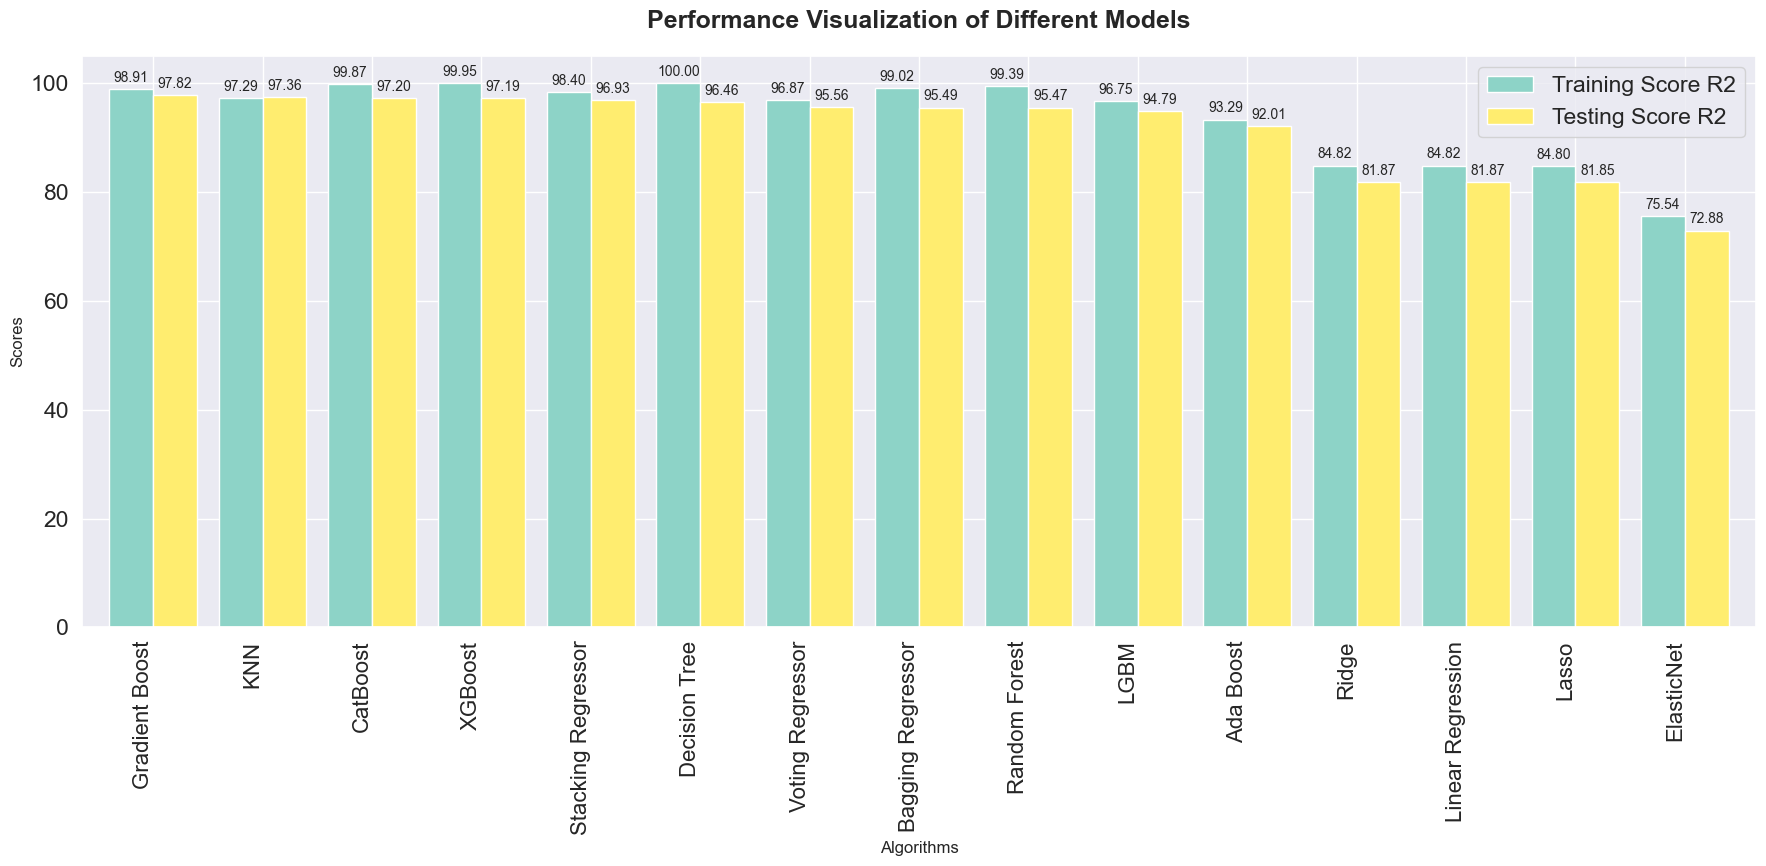

In [175]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score R2","Testing Score R2"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()
plt.show()

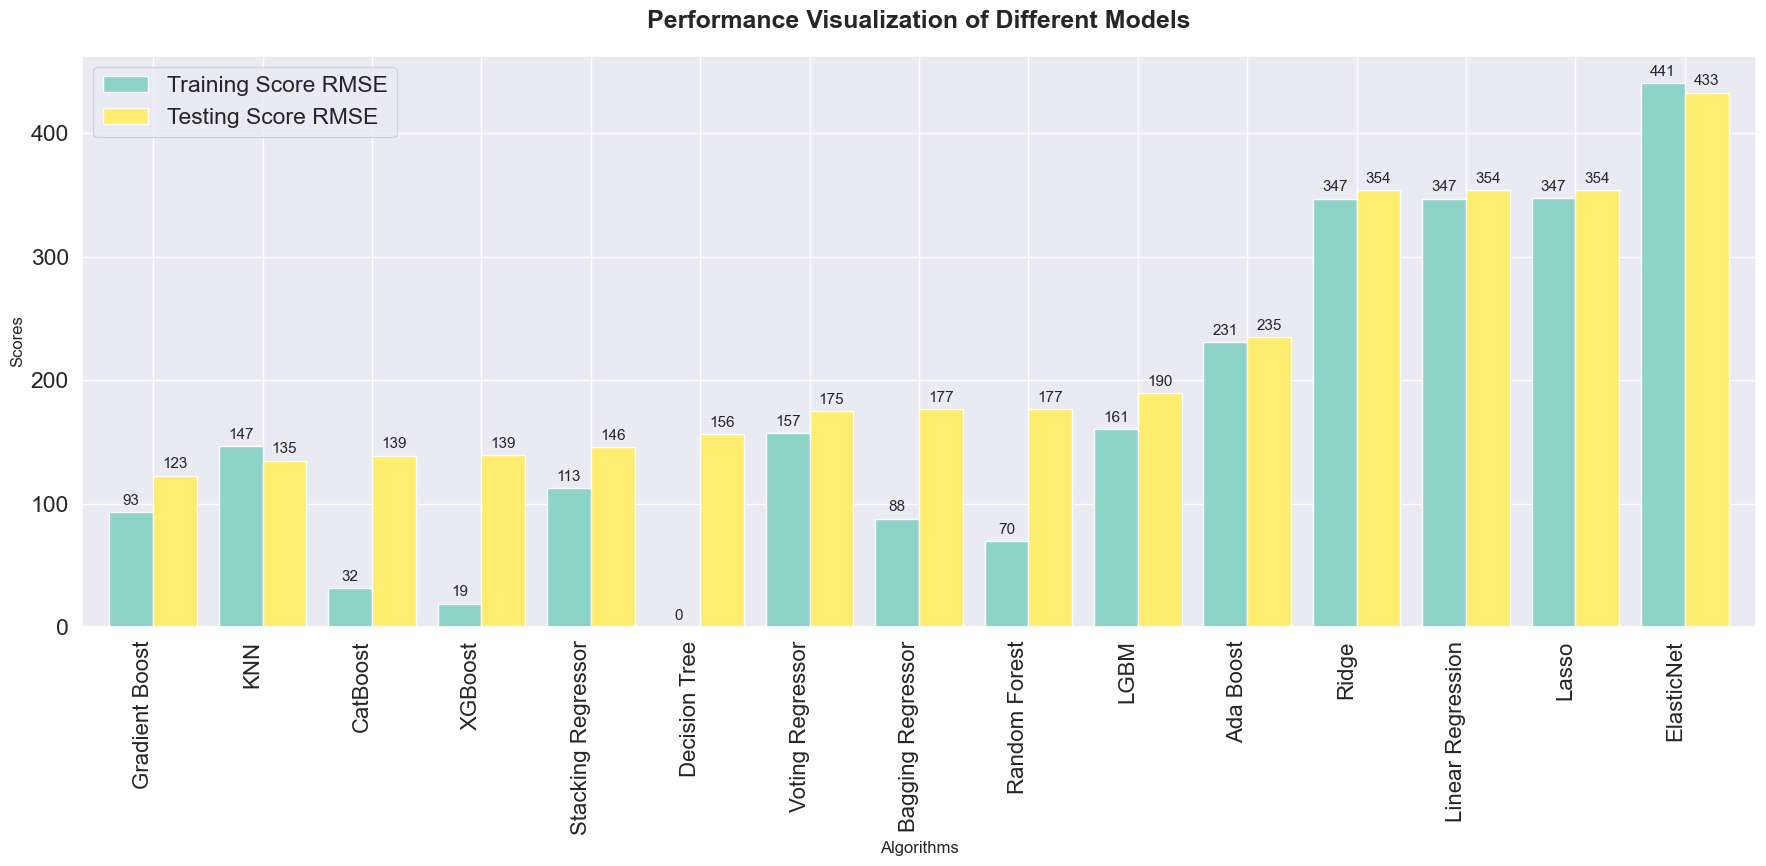

In [176]:
# Plotting bar chart for training and testing scores
ax = df_model_sort.plot(
    x="Algorithms",
    y=["Training Score RMSE","Testing Score RMSE"],
    kind="bar",
    figsize=(18, 9),
    colormap="Set3",
    width=0.8
)

# Adding title and labels
plt.title("Performance Visualization of Different Models", fontsize=18, fontweight="bold", pad=20)
plt.xlabel("Algorithms", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=16)

# Adding data labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=11, padding=3)

plt.tight_layout()
plt.show()